In [1]:
# Import Dependencies
%matplotlib inline

# Start Python Imports
import math, time, random, datetime

# Data Manipulation
import numpy as np
import pandas as pd

# Visualization 
import matplotlib.pyplot as plt
#import missingno
import seaborn as sns
plt.style.use('seaborn-whitegrid')

# Preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize

# Machine learning
#import catboost
from sklearn.model_selection import train_test_split
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
#from catboost import CatBoostClassifier, Pool, cv

# Let's be rebels and ignore warnings for now
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

 # EDA

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
len(train)

891

In [6]:
len(test)

418

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<AxesSubplot:>

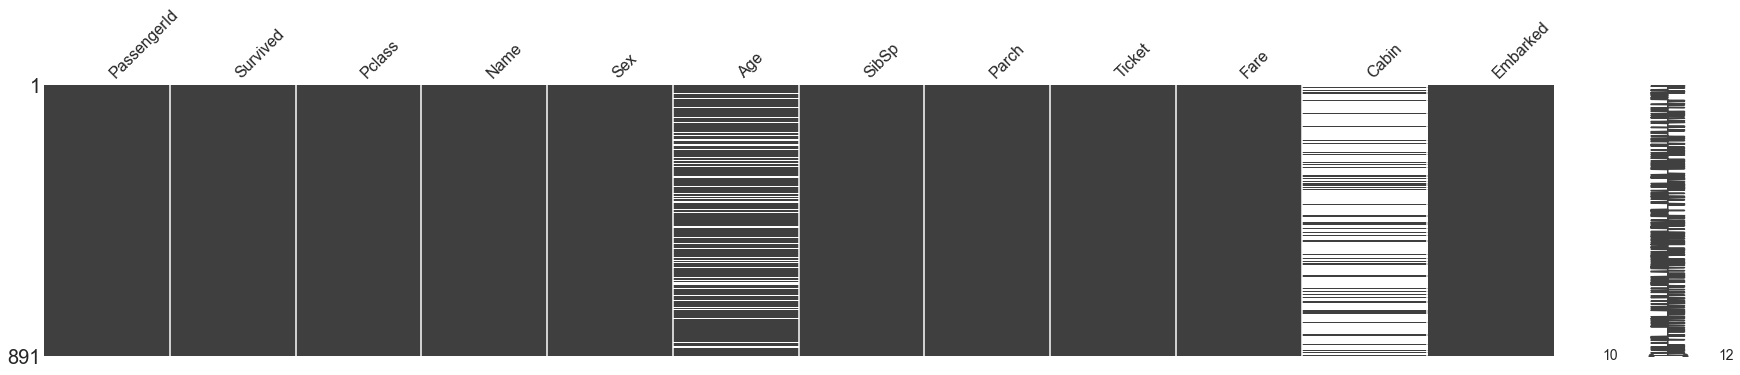

In [9]:
import missingno
missingno.matrix(train, figsize=(30,5))

In [10]:
missing_data=train.isnull()
for x in missing_data.columns.values.tolist():
    print(x)
    print (missing_data[x].value_counts())
    print("")

PassengerId
False    891
Name: PassengerId, dtype: int64

Survived
False    891
Name: Survived, dtype: int64

Pclass
False    891
Name: Pclass, dtype: int64

Name
False    891
Name: Name, dtype: int64

Sex
False    891
Name: Sex, dtype: int64

Age
False    714
True     177
Name: Age, dtype: int64

SibSp
False    891
Name: SibSp, dtype: int64

Parch
False    891
Name: Parch, dtype: int64

Ticket
False    891
Name: Ticket, dtype: int64

Fare
False    891
Name: Fare, dtype: int64

Cabin
True     687
False    204
Name: Cabin, dtype: int64

Embarked
False    889
True       2
Name: Embarked, dtype: int64



In [11]:
def find_missing_values(df,columns):
    missing_values={}
    print("the total number of missing values are:")
    all_length=len(df)
    for cl in columns:
        total_columns_values=df[cl].value_counts().sum()
        missing_values[cl]=all_length-total_columns_values
    return missing_values

exec_missing_values=find_missing_values(train, columns=train.columns)
exec_missing_values
    

the total number of missing values are:


{'PassengerId': 0,
 'Survived': 0,
 'Pclass': 0,
 'Name': 0,
 'Sex': 0,
 'Age': 177,
 'SibSp': 0,
 'Parch': 0,
 'Ticket': 0,
 'Fare': 0,
 'Cabin': 687,
 'Embarked': 2}

### Age

<AxesSubplot:xlabel='Age', ylabel='Density'>

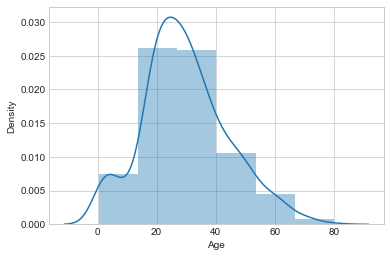

In [12]:
sns.distplot(train["Age"], bins=6)

In [13]:
df_bin = pd.DataFrame() # for discretised continuous variables
df_con = pd.DataFrame() # for continuous variables

In [14]:
train['Age'].head(20)

0     22.0
1     38.0
2     26.0
3     35.0
4     35.0
5      NaN
6     54.0
7      2.0
8     27.0
9     14.0
10     4.0
11    58.0
12    20.0
13    39.0
14    14.0
15    55.0
16     2.0
17     NaN
18    31.0
19     NaN
Name: Age, dtype: float64

In [15]:
age_loss=train['Age'].mean()
train['Age'].replace(np.nan,age_loss,inplace=True)

In [16]:
train['Age'].head(20)

0     22.000000
1     38.000000
2     26.000000
3     35.000000
4     35.000000
5     29.699118
6     54.000000
7      2.000000
8     27.000000
9     14.000000
10     4.000000
11    58.000000
12    20.000000
13    39.000000
14    14.000000
15    55.000000
16     2.000000
17    29.699118
18    31.000000
19    29.699118
Name: Age, dtype: float64

In [17]:
df_bin['Age']=train['Age']
df_con['Age']=train['Age']

### pclass

0    549
1    342
Name: Survived, dtype: int64


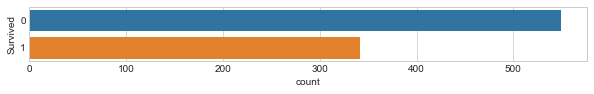

In [18]:
# How many people survived?
fig = plt.figure(figsize=(10,1))
sns.countplot(y='Survived', data=train);
print(train.Survived.value_counts())

In [19]:
# Let's add this to our subset dataframes
df_bin['Survived'] = train['Survived']
df_con['Survived'] = train['Survived']

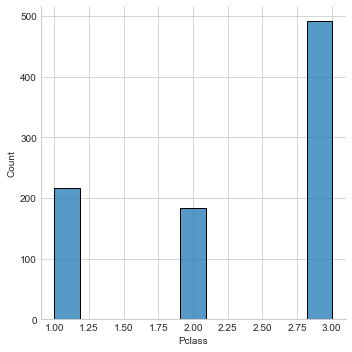

In [20]:
sns.displot(train["Pclass"])

In [21]:
df_bin['Pclass'] = train['Pclass']
df_con['Pclass'] = train['Pclass']

### Sex

male      577
female    314
Name: Sex, dtype: int64


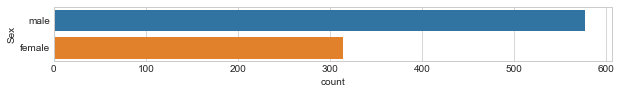

In [22]:
fig=plt.figure(figsize=(10,1))
sns.countplot(y="Sex", data=train)
print(train.Sex.value_counts())

In [23]:
df_bin['Sex']=train['Sex']
df_bin['Sex']=np.where(df_bin['Sex']=="male",0,1)
df_con['Sex']=train['Sex']

<AxesSubplot:xlabel='Sex', ylabel='Density'>

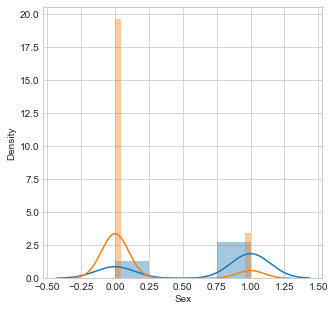

In [24]:
fig=plt.figure(figsize=(5,5))
sns.distplot(df_bin.loc[df_bin['Survived']==1]["Sex"],kde_kws={"label":"Survived"});
sns.distplot(df_bin.loc[df_bin['Survived']==0]["Sex"],kde_kws={"label":"Didnot survived"})

In [25]:
# Add SibSp to subset dataframes
df_bin['SibSp'] = train['SibSp']
df_con['SibSp'] = train['SibSp']

In [26]:
# Add SibSp to subset dataframes
df_bin['Parch'] = train['Parch']
df_con['Parch'] = train['Parch']

In [27]:
def plot_count_dist(data, bin_df, label_column, target_column, figsize=(20, 5), use_bin_df=False):
    if use_bin_df: 
        fig = plt.figure(figsize=figsize)
        plt.subplot(1, 2, 1)
        sns.countplot(y=target_column, data=bin_df);
        plt.subplot(1, 2, 2)
        sns.distplot(data.loc[data[label_column] == 1][target_column], 
                     kde_kws={"label": "Survived"});
        sns.distplot(data.loc[data[label_column] == 0][target_column], 
                     kde_kws={"label": "Did not survive"});
    else:
        fig = plt.figure(figsize=figsize)
        plt.subplot(1, 2, 1)
        sns.countplot(y=target_column, data=data);
        plt.subplot(1, 2, 2)
        sns.distplot(data.loc[data[label_column] == 1][target_column], 
                     kde_kws={"label": "Survived"});
        sns.distplot(data.loc[data[label_column] == 0][target_column], 
                     kde_kws={"label": "Did not survive"});

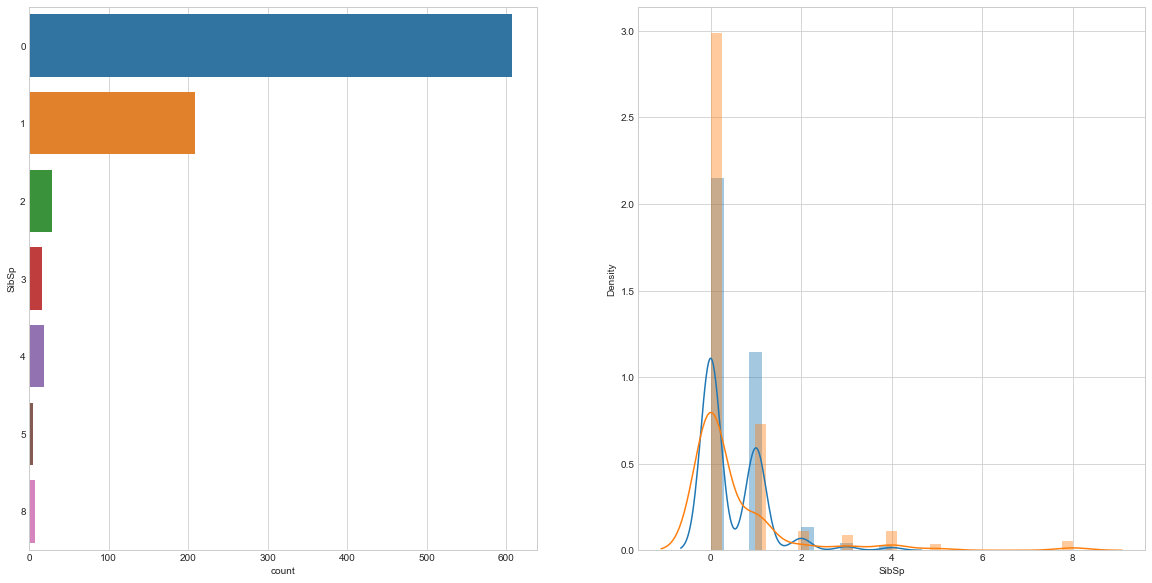

In [28]:
# Visualise the counts of SibSp and the distribution of the values
# against Survived
plot_count_dist(train, 
                bin_df=df_bin, 
                label_column='Survived', 
                target_column='SibSp', 
                figsize=(20, 10))

### Fare

In [29]:
train.Fare.value_counts()

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
50.4958     1
13.8583     1
8.4583      1
7.7250      1
7.5208      1
Name: Fare, Length: 248, dtype: int64

In [30]:
print("there are {} unique values".format(len(train.Fare.unique())))

there are 248 unique values


In [31]:
df_bin['Fare'] = pd.cut(train['Fare'], bins=5)
df_con['Fare'] = train['Fare']

In [32]:
df_bin.Fare.value_counts()

(-0.512, 102.466]     838
(102.466, 204.932]     33
(204.932, 307.398]     17
(409.863, 512.329]      3
(307.398, 409.863]      0
Name: Fare, dtype: int64

### Embaraked

In [33]:
train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

<AxesSubplot:xlabel='count', ylabel='Embarked'>

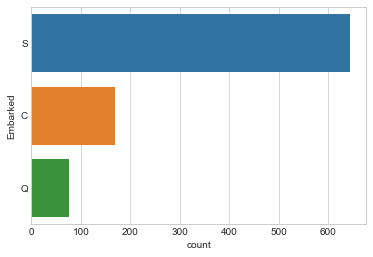

In [34]:
sns.countplot(data=train, y='Embarked')

In [35]:
df_bin['Embarked'] = train['Embarked']
df_con['Embarked'] = train['Embarked']

In [36]:
df_bin=df_bin.dropna(subset=["Embarked"])
df_con=df_con.dropna(subset=["Embarked"])

In [37]:
df_bin=df_bin.drop("Age",1)

In [38]:
df_bin.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,0,3,0,1,0,"(-0.512, 102.466]",S
1,1,1,1,1,0,"(-0.512, 102.466]",C
2,1,3,1,0,0,"(-0.512, 102.466]",S
3,1,1,1,1,0,"(-0.512, 102.466]",S
4,0,3,0,0,0,"(-0.512, 102.466]",S


In [39]:
df_con=df_con.drop('Age',1)

In [40]:
df_con

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,0,3,male,1,0,7.2500,S
1,1,1,female,1,0,71.2833,C
2,1,3,female,0,0,7.9250,S
3,1,1,female,1,0,53.1000,S
4,0,3,male,0,0,8.0500,S
...,...,...,...,...,...,...,...
886,0,2,male,0,0,13.0000,S
887,1,1,female,0,0,30.0000,S
888,0,3,female,1,2,23.4500,S
889,1,1,male,0,0,30.0000,C


### Feature engineering

In [41]:
# One hot encoding for the binned variables
one_hot_cols= df_bin.columns.tolist()
one_hot_cols.remove("Survived")
one_hot_encoded=pd.get_dummies(df_bin, columns=one_hot_cols)

In [42]:
one_hot_encoded.head()

,Survived,Pclass_1,Pclass_2,Pclass_3,Sex_0,Sex_1,SibSp_0,SibSp_1,SibSp_2,SibSp_3,...,Parch_5,Parch_6,"Fare_(-0.512, 102.466]","Fare_(102.466, 204.932]","Fare_(204.932, 307.398]","Fare_(307.398, 409.863]","Fare_(409.863, 512.329]",Embarked_C,Embarked_Q,Embarked_S
0,0,0,0,1,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
1,1,1,0,0,0,1,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
2,1,0,0,1,0,1,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,1,1,0,0,0,1,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
4,0,0,0,1,1,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [43]:
# label encoding
df_con_enc=df_con.apply(LabelEncoder().fit_transform)

In [44]:
df_con_enc

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,0,2,1,1,0,18,2
1,1,0,0,1,0,207,0
2,1,2,0,0,0,41,2
3,1,0,0,1,0,189,2
4,0,2,1,0,0,43,2
...,...,...,...,...,...,...,...
886,0,1,1,0,0,85,2
887,1,0,0,0,0,153,2
888,0,2,0,1,2,131,2
889,1,0,1,0,0,153,0


### Modeling

In [45]:
selected_model=df_con_enc
X_train=selected_model.drop('Survived',1)
Y_train=selected_model.Survived

In [46]:
Y_train

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 889, dtype: int64

In [47]:
pip install catboost

Note: you may need to restart the kernel to use updated packages.


In [48]:
from catboost import CatBoostClassifier, Pool, cv

In [49]:
# Function that runs the requested algorithm and returns the accuracy metrics
def fit_ml_algo(algo, X_train, y_train, cv):
    
    # One Pass
    model = algo.fit(X_train, y_train)
    acc = round(model.score(X_train, y_train) * 100, 2)
    
    # Cross Validation 
    train_pred = model_selection.cross_val_predict(algo, 
                                                  X_train, 
                                                  y_train, 
                                                  cv=cv, 
                                                  n_jobs = -1)
    # Cross-validation accuracy metric
    acc_cv = round(metrics.accuracy_score(y_train, train_pred) * 100, 2)
    
    return train_pred, acc, acc_cv

In [50]:
# Logistic Regression
start_time = time.time()
train_pred_log, acc_log, acc_cv_log = fit_ml_algo(LogisticRegression(), 
                                                               X_train, 
                                                               Y_train, 
                                                                    10)
log_time = (time.time() - start_time)
print("Accuracy: %s" % acc_log)
print("Accuracy CV 10-Fold: %s" % acc_cv_log)
print("Running Time: %s" % datetime.timedelta(seconds=log_time))

Accuracy: 79.42
Accuracy CV 10-Fold: 78.18
Running Time: 0:00:05.849697


In [51]:
# k-Nearest Neighbours
start_time = time.time()
train_pred_knn, acc_knn, acc_cv_knn = fit_ml_algo(KNeighborsClassifier(), 
                                                  X_train, 
                                                  Y_train, 
                                                  10)
knn_time = (time.time() - start_time)
print("Accuracy: %s" % acc_knn)
print("Accuracy CV 10-Fold: %s" % acc_cv_knn)
print("Running Time: %s" % datetime.timedelta(seconds=knn_time))

Accuracy: 81.44
Accuracy CV 10-Fold: 73.68
Running Time: 0:00:00.349910


In [52]:
# Gaussian Naive Bayes
start_time = time.time()
train_pred_gaussian, acc_gaussian, acc_cv_gaussian = fit_ml_algo(GaussianNB(), 
                                                                      X_train, 
                                                                      Y_train, 
                                                                           10)
gaussian_time = (time.time() - start_time)
print("Accuracy: %s" % acc_gaussian)
print("Accuracy CV 10-Fold: %s" % acc_cv_gaussian)
print("Running Time: %s" % datetime.timedelta(seconds=gaussian_time))

Accuracy: 76.72
Accuracy CV 10-Fold: 76.38
Running Time: 0:00:00.062499


In [53]:
# Linear SVC
start_time = time.time()
train_pred_svc, acc_linear_svc, acc_cv_linear_svc = fit_ml_algo(LinearSVC(),
                                                                X_train, 
                                                                Y_train, 
                                                                10)
linear_svc_time = (time.time() - start_time)
print("Accuracy: %s" % acc_linear_svc)
print("Accuracy CV 10-Fold: %s" % acc_cv_linear_svc)
print("Running Time: %s" % datetime.timedelta(seconds=linear_svc_time))

Accuracy: 62.32
Accuracy CV 10-Fold: 68.39
Running Time: 0:00:00.328101


In [54]:
# Stochastic Gradient Descent
start_time = time.time()
train_pred_sgd, acc_sgd, acc_cv_sgd = fit_ml_algo(SGDClassifier(), 
                                                  X_train, 
                                                  Y_train,
                                                  10)
sgd_time = (time.time() - start_time)
print("Accuracy: %s" % acc_sgd)
print("Accuracy CV 10-Fold: %s" % acc_cv_sgd)
print("Running Time: %s" % datetime.timedelta(seconds=sgd_time))

Accuracy: 61.75
Accuracy CV 10-Fold: 62.77
Running Time: 0:00:00.132979


In [55]:
# Decision Tree Classifier
start_time = time.time()
train_pred_dt, acc_dt, acc_cv_dt = fit_ml_algo(DecisionTreeClassifier(), 
                                                                X_train, 
                                                                Y_train,
                                                                10)
dt_time = (time.time() - start_time)
print("Accuracy: %s" % acc_dt)
print("Accuracy CV 10-Fold: %s" % acc_cv_dt)
print("Running Time: %s" % datetime.timedelta(seconds=dt_time))

Accuracy: 92.46
Accuracy CV 10-Fold: 79.53
Running Time: 0:00:00.249449


In [56]:
# Gradient Boosting Trees
start_time = time.time()
train_pred_gbt, acc_gbt, acc_cv_gbt = fit_ml_algo(GradientBoostingClassifier(), 
                                                                       X_train, 
                                                                       Y_train,
                                                                       10)
gbt_time = (time.time() - start_time)
print("Accuracy: %s" % acc_gbt)
print("Accuracy CV 10-Fold: %s" % acc_cv_gbt)
print("Running Time: %s" % datetime.timedelta(seconds=gbt_time))

Accuracy: 86.39
Accuracy CV 10-Fold: 81.1
Running Time: 0:00:00.726651


In [57]:
# Define the categorical features for the CatBoost model
cat_features = np.where(X_train.dtypes != np.float)[0]
cat_features

array([0, 1, 2, 3, 4, 5], dtype=int64)

In [58]:
# Use the CatBoost Pool() function to pool together the training data and categorical feature labels
train_pool = Pool(X_train, 
                  Y_train,
                  cat_features)

In [59]:
# CatBoost model definition
catboost_model = CatBoostClassifier(iterations=1000,
                                    custom_loss=['Accuracy'],
                                    loss_function='Logloss')

# Fit CatBoost model
catboost_model.fit(train_pool,
                   plot=True)

# CatBoost accuracy
acc_catboost = round(catboost_model.score(X_train, Y_train) * 100, 2)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.009797
0:	learn: 0.6873671	total: 367ms	remaining: 6m 6s
1:	learn: 0.6820241	total: 396ms	remaining: 3m 17s
2:	learn: 0.6762783	total: 418ms	remaining: 2m 19s
3:	learn: 0.6714483	total: 445ms	remaining: 1m 50s
4:	learn: 0.6662935	total: 474ms	remaining: 1m 34s
5:	learn: 0.6605739	total: 503ms	remaining: 1m 23s
6:	learn: 0.6554674	total: 530ms	remaining: 1m 15s
7:	learn: 0.6506963	total: 549ms	remaining: 1m 8s
8:	learn: 0.6458177	total: 578ms	remaining: 1m 3s
9:	learn: 0.6414410	total: 599ms	remaining: 59.3s
10:	learn: 0.6368860	total: 624ms	remaining: 56.1s
11:	learn: 0.6322663	total: 650ms	remaining: 53.6s
12:	learn: 0.6280648	total: 674ms	remaining: 51.2s
13:	learn: 0.6235529	total: 696ms	remaining: 49s
14:	learn: 0.6188170	total: 717ms	remaining: 47.1s
15:	learn: 0.6144028	total: 737ms	remaining: 45.4s
16:	learn: 0.6104758	total: 757ms	remaining: 43.8s
17:	learn: 0.6068397	total: 779ms	remaining: 42.5s
18:	learn: 0.6029228	total: 804ms	remaining: 41.5s
19:	lea

164:	learn: 0.4207299	total: 3.89s	remaining: 19.7s
165:	learn: 0.4200813	total: 3.91s	remaining: 19.6s
166:	learn: 0.4196248	total: 3.93s	remaining: 19.6s
167:	learn: 0.4193589	total: 3.95s	remaining: 19.6s
168:	learn: 0.4189697	total: 3.97s	remaining: 19.5s
169:	learn: 0.4185550	total: 3.99s	remaining: 19.5s
170:	learn: 0.4181441	total: 4.01s	remaining: 19.4s
171:	learn: 0.4181256	total: 4.02s	remaining: 19.3s
172:	learn: 0.4177366	total: 4.04s	remaining: 19.3s
173:	learn: 0.4173402	total: 4.06s	remaining: 19.3s
174:	learn: 0.4169801	total: 4.09s	remaining: 19.3s
175:	learn: 0.4166223	total: 4.12s	remaining: 19.3s
176:	learn: 0.4164220	total: 4.14s	remaining: 19.3s
177:	learn: 0.4161651	total: 4.17s	remaining: 19.2s
178:	learn: 0.4158213	total: 4.19s	remaining: 19.2s
179:	learn: 0.4152046	total: 4.21s	remaining: 19.2s
180:	learn: 0.4148948	total: 4.23s	remaining: 19.2s
181:	learn: 0.4144610	total: 4.26s	remaining: 19.2s
182:	learn: 0.4143226	total: 4.28s	remaining: 19.1s
183:	learn: 

325:	learn: 0.3794167	total: 7.48s	remaining: 15.5s
326:	learn: 0.3791933	total: 7.51s	remaining: 15.4s
327:	learn: 0.3790339	total: 7.53s	remaining: 15.4s
328:	learn: 0.3788391	total: 7.55s	remaining: 15.4s
329:	learn: 0.3785127	total: 7.57s	remaining: 15.4s
330:	learn: 0.3783877	total: 7.59s	remaining: 15.3s
331:	learn: 0.3783873	total: 7.6s	remaining: 15.3s
332:	learn: 0.3782375	total: 7.62s	remaining: 15.3s
333:	learn: 0.3779382	total: 7.64s	remaining: 15.2s
334:	learn: 0.3777519	total: 7.66s	remaining: 15.2s
335:	learn: 0.3775949	total: 7.69s	remaining: 15.2s
336:	learn: 0.3775454	total: 7.7s	remaining: 15.1s
337:	learn: 0.3773285	total: 7.72s	remaining: 15.1s
338:	learn: 0.3769600	total: 7.74s	remaining: 15.1s
339:	learn: 0.3768259	total: 7.76s	remaining: 15.1s
340:	learn: 0.3764642	total: 7.79s	remaining: 15.1s
341:	learn: 0.3764500	total: 7.8s	remaining: 15s
342:	learn: 0.3762779	total: 7.82s	remaining: 15s
343:	learn: 0.3762727	total: 7.83s	remaining: 14.9s
344:	learn: 0.37598

490:	learn: 0.3558188	total: 11s	remaining: 11.4s
491:	learn: 0.3555641	total: 11s	remaining: 11.3s
492:	learn: 0.3555628	total: 11s	remaining: 11.3s
493:	learn: 0.3554153	total: 11s	remaining: 11.3s
494:	learn: 0.3552888	total: 11.1s	remaining: 11.3s
495:	learn: 0.3552022	total: 11.1s	remaining: 11.3s
496:	learn: 0.3551900	total: 11.1s	remaining: 11.2s
497:	learn: 0.3551778	total: 11.1s	remaining: 11.2s
498:	learn: 0.3550823	total: 11.1s	remaining: 11.2s
499:	learn: 0.3548702	total: 11.2s	remaining: 11.2s
500:	learn: 0.3546092	total: 11.2s	remaining: 11.2s
501:	learn: 0.3544831	total: 11.2s	remaining: 11.1s
502:	learn: 0.3544262	total: 11.3s	remaining: 11.1s
503:	learn: 0.3543220	total: 11.3s	remaining: 11.1s
504:	learn: 0.3542610	total: 11.3s	remaining: 11.1s
505:	learn: 0.3542586	total: 11.3s	remaining: 11s
506:	learn: 0.3541593	total: 11.3s	remaining: 11s
507:	learn: 0.3541593	total: 11.3s	remaining: 11s
508:	learn: 0.3540893	total: 11.4s	remaining: 11s
509:	learn: 0.3539563	total:

653:	learn: 0.3361936	total: 14.7s	remaining: 7.79s
654:	learn: 0.3361827	total: 14.7s	remaining: 7.75s
655:	learn: 0.3361111	total: 14.7s	remaining: 7.73s
656:	learn: 0.3361051	total: 14.8s	remaining: 7.7s
657:	learn: 0.3360591	total: 14.8s	remaining: 7.68s
658:	learn: 0.3358705	total: 14.8s	remaining: 7.66s
659:	learn: 0.3358087	total: 14.8s	remaining: 7.64s
660:	learn: 0.3357506	total: 14.8s	remaining: 7.62s
661:	learn: 0.3357333	total: 14.9s	remaining: 7.59s
662:	learn: 0.3357201	total: 14.9s	remaining: 7.56s
663:	learn: 0.3356998	total: 14.9s	remaining: 7.54s
664:	learn: 0.3356852	total: 14.9s	remaining: 7.51s
665:	learn: 0.3356836	total: 14.9s	remaining: 7.49s
666:	learn: 0.3356686	total: 15s	remaining: 7.47s
667:	learn: 0.3356134	total: 15s	remaining: 7.45s
668:	learn: 0.3355980	total: 15s	remaining: 7.43s
669:	learn: 0.3355421	total: 15s	remaining: 7.4s
670:	learn: 0.3355313	total: 15.1s	remaining: 7.39s
671:	learn: 0.3353951	total: 15.1s	remaining: 7.36s
672:	learn: 0.3353864	

814:	learn: 0.3217734	total: 18.7s	remaining: 4.25s
815:	learn: 0.3217215	total: 18.7s	remaining: 4.22s
816:	learn: 0.3217080	total: 18.7s	remaining: 4.2s
817:	learn: 0.3216881	total: 18.8s	remaining: 4.17s
818:	learn: 0.3216109	total: 18.8s	remaining: 4.15s
819:	learn: 0.3216030	total: 18.8s	remaining: 4.13s
820:	learn: 0.3214882	total: 18.8s	remaining: 4.11s
821:	learn: 0.3213049	total: 18.9s	remaining: 4.08s
822:	learn: 0.3211425	total: 18.9s	remaining: 4.06s
823:	learn: 0.3208993	total: 18.9s	remaining: 4.04s
824:	learn: 0.3207609	total: 18.9s	remaining: 4.01s
825:	learn: 0.3207394	total: 19s	remaining: 3.99s
826:	learn: 0.3206503	total: 19s	remaining: 3.97s
827:	learn: 0.3204896	total: 19s	remaining: 3.95s
828:	learn: 0.3204896	total: 19s	remaining: 3.92s
829:	learn: 0.3204021	total: 19s	remaining: 3.9s
830:	learn: 0.3202085	total: 19.1s	remaining: 3.88s
831:	learn: 0.3200531	total: 19.1s	remaining: 3.85s
832:	learn: 0.3199556	total: 19.1s	remaining: 3.83s
833:	learn: 0.3197885	to

979:	learn: 0.3057440	total: 22.3s	remaining: 455ms
980:	learn: 0.3057269	total: 22.3s	remaining: 432ms
981:	learn: 0.3055494	total: 22.3s	remaining: 409ms
982:	learn: 0.3054616	total: 22.3s	remaining: 386ms
983:	learn: 0.3054006	total: 22.4s	remaining: 364ms
984:	learn: 0.3053559	total: 22.4s	remaining: 341ms
985:	learn: 0.3052900	total: 22.4s	remaining: 318ms
986:	learn: 0.3052030	total: 22.4s	remaining: 295ms
987:	learn: 0.3051972	total: 22.5s	remaining: 273ms
988:	learn: 0.3051685	total: 22.5s	remaining: 250ms
989:	learn: 0.3051132	total: 22.5s	remaining: 227ms
990:	learn: 0.3051043	total: 22.5s	remaining: 205ms
991:	learn: 0.3049225	total: 22.6s	remaining: 182ms
992:	learn: 0.3048039	total: 22.6s	remaining: 159ms
993:	learn: 0.3047991	total: 22.6s	remaining: 136ms
994:	learn: 0.3047576	total: 22.6s	remaining: 114ms
995:	learn: 0.3047100	total: 22.6s	remaining: 90.9ms
996:	learn: 0.3046347	total: 22.7s	remaining: 68.2ms
997:	learn: 0.3044994	total: 22.7s	remaining: 45.4ms
998:	lear

In [60]:
# How long will this take?
start_time = time.time()

# Set params for cross-validation as same as initial model
cv_params = catboost_model.get_params()

# Run the cross-validation for 10-folds (same as the other models)
cv_data = cv(train_pool,
             cv_params,
             fold_count=10,
             plot=True)

# How long did it take?
catboost_time = (time.time() - start_time)

# CatBoost CV results save into a dataframe (cv_data), let's withdraw the maximum accuracy score
acc_cv_catboost = round(np.max(cv_data['test-Accuracy-mean']) * 100, 2)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/10]
0:	learn: 0.6777781	test: 0.6799314	best: 0.6799314 (0)	total: 18.4ms	remaining: 18.4s
1:	learn: 0.6604217	test: 0.6654870	best: 0.6654870 (1)	total: 47.9ms	remaining: 23.9s
2:	learn: 0.6453623	test: 0.6523665	best: 0.6523665 (2)	total: 67.6ms	remaining: 22.5s
3:	learn: 0.6315487	test: 0.6405886	best: 0.6405886 (3)	total: 78.4ms	remaining: 19.5s
4:	learn: 0.6172874	test: 0.6290155	best: 0.6290155 (4)	total: 98.4ms	remaining: 19.6s
5:	learn: 0.6054068	test: 0.6189328	best: 0.6189328 (5)	total: 109ms	remaining: 18s
6:	learn: 0.5912990	test: 0.6086238	best: 0.6086238 (6)	total: 129ms	remaining: 18.3s
7:	learn: 0.5798538	test: 0.5985885	best: 0.5985885 (7)	total: 150ms	remaining: 18.6s
8:	learn: 0.5700924	test: 0.5910391	best: 0.5910391 (8)	total: 170ms	remaining: 18.7s
9:	learn: 0.5629558	test: 0.5862334	best: 0.5862334 (9)	total: 191ms	remaining: 18.9s
10:	learn: 0.5524692	test: 0.5787673	best: 0.5787673 (10)	total: 215ms	remaining: 19.3s
11:	learn: 0.5473361	test

101:	learn: 0.3728794	test: 0.4859563	best: 0.4858707 (97)	total: 1.88s	remaining: 16.5s
102:	learn: 0.3724664	test: 0.4861730	best: 0.4858707 (97)	total: 1.91s	remaining: 16.6s
103:	learn: 0.3718455	test: 0.4858746	best: 0.4858707 (97)	total: 1.93s	remaining: 16.7s
104:	learn: 0.3718087	test: 0.4858405	best: 0.4858405 (104)	total: 1.96s	remaining: 16.7s
105:	learn: 0.3717854	test: 0.4859602	best: 0.4858405 (104)	total: 1.96s	remaining: 16.6s
106:	learn: 0.3711834	test: 0.4859592	best: 0.4858405 (104)	total: 1.98s	remaining: 16.5s
107:	learn: 0.3710166	test: 0.4858256	best: 0.4858256 (107)	total: 2s	remaining: 16.5s
108:	learn: 0.3708234	test: 0.4859517	best: 0.4858256 (107)	total: 2.01s	remaining: 16.4s
109:	learn: 0.3705447	test: 0.4857620	best: 0.4857620 (109)	total: 2.03s	remaining: 16.4s
110:	learn: 0.3697072	test: 0.4865940	best: 0.4857620 (109)	total: 2.05s	remaining: 16.4s
111:	learn: 0.3692857	test: 0.4867078	best: 0.4857620 (109)	total: 2.07s	remaining: 16.4s
112:	learn: 0.36

199:	learn: 0.3341292	test: 0.4867052	best: 0.4848274 (182)	total: 3.69s	remaining: 14.8s
200:	learn: 0.3337310	test: 0.4862112	best: 0.4848274 (182)	total: 3.71s	remaining: 14.8s
201:	learn: 0.3331774	test: 0.4860826	best: 0.4848274 (182)	total: 3.73s	remaining: 14.8s
202:	learn: 0.3325300	test: 0.4858223	best: 0.4848274 (182)	total: 3.75s	remaining: 14.7s
203:	learn: 0.3323225	test: 0.4860708	best: 0.4848274 (182)	total: 3.77s	remaining: 14.7s
204:	learn: 0.3320837	test: 0.4861626	best: 0.4848274 (182)	total: 3.79s	remaining: 14.7s
205:	learn: 0.3313833	test: 0.4858107	best: 0.4848274 (182)	total: 3.82s	remaining: 14.7s
206:	learn: 0.3312211	test: 0.4858850	best: 0.4848274 (182)	total: 3.87s	remaining: 14.8s
207:	learn: 0.3309345	test: 0.4860174	best: 0.4848274 (182)	total: 3.94s	remaining: 15s
208:	learn: 0.3306690	test: 0.4865513	best: 0.4848274 (182)	total: 4.01s	remaining: 15.2s
209:	learn: 0.3304776	test: 0.4866657	best: 0.4848274 (182)	total: 4.03s	remaining: 15.2s
210:	learn: 

291:	learn: 0.3045286	test: 0.4840260	best: 0.4836089 (280)	total: 6.24s	remaining: 15.1s
292:	learn: 0.3040028	test: 0.4839822	best: 0.4836089 (280)	total: 6.32s	remaining: 15.3s
293:	learn: 0.3038506	test: 0.4841261	best: 0.4836089 (280)	total: 6.37s	remaining: 15.3s
294:	learn: 0.3036744	test: 0.4845199	best: 0.4836089 (280)	total: 6.4s	remaining: 15.3s
295:	learn: 0.3035157	test: 0.4843844	best: 0.4836089 (280)	total: 6.43s	remaining: 15.3s
296:	learn: 0.3033342	test: 0.4843336	best: 0.4836089 (280)	total: 6.52s	remaining: 15.4s
297:	learn: 0.3032691	test: 0.4843602	best: 0.4836089 (280)	total: 6.55s	remaining: 15.4s
298:	learn: 0.3032320	test: 0.4842752	best: 0.4836089 (280)	total: 6.59s	remaining: 15.4s
299:	learn: 0.3029955	test: 0.4843643	best: 0.4836089 (280)	total: 6.63s	remaining: 15.5s
300:	learn: 0.3026806	test: 0.4842348	best: 0.4836089 (280)	total: 6.68s	remaining: 15.5s
301:	learn: 0.3024666	test: 0.4840471	best: 0.4836089 (280)	total: 6.73s	remaining: 15.6s
302:	learn:

383:	learn: 0.2852905	test: 0.4837513	best: 0.4829058 (379)	total: 8.89s	remaining: 14.3s
384:	learn: 0.2845977	test: 0.4844216	best: 0.4829058 (379)	total: 8.91s	remaining: 14.2s
385:	learn: 0.2845814	test: 0.4843061	best: 0.4829058 (379)	total: 8.93s	remaining: 14.2s
386:	learn: 0.2842904	test: 0.4837643	best: 0.4829058 (379)	total: 8.95s	remaining: 14.2s
387:	learn: 0.2842904	test: 0.4837643	best: 0.4829058 (379)	total: 8.97s	remaining: 14.1s
388:	learn: 0.2839743	test: 0.4838807	best: 0.4829058 (379)	total: 8.99s	remaining: 14.1s
389:	learn: 0.2839406	test: 0.4838756	best: 0.4829058 (379)	total: 9.01s	remaining: 14.1s
390:	learn: 0.2838150	test: 0.4835221	best: 0.4829058 (379)	total: 9.02s	remaining: 14.1s
391:	learn: 0.2838120	test: 0.4835307	best: 0.4829058 (379)	total: 9.04s	remaining: 14s
392:	learn: 0.2836842	test: 0.4832695	best: 0.4829058 (379)	total: 9.06s	remaining: 14s
393:	learn: 0.2831156	test: 0.4833236	best: 0.4829058 (379)	total: 9.08s	remaining: 14s
394:	learn: 0.28

482:	learn: 0.2655613	test: 0.4839451	best: 0.4829058 (379)	total: 10.9s	remaining: 11.7s
483:	learn: 0.2650969	test: 0.4837437	best: 0.4829058 (379)	total: 11s	remaining: 11.7s
484:	learn: 0.2647596	test: 0.4839235	best: 0.4829058 (379)	total: 11s	remaining: 11.7s
485:	learn: 0.2645663	test: 0.4837804	best: 0.4829058 (379)	total: 11s	remaining: 11.6s
486:	learn: 0.2643831	test: 0.4838569	best: 0.4829058 (379)	total: 11s	remaining: 11.6s
487:	learn: 0.2643528	test: 0.4838579	best: 0.4829058 (379)	total: 11s	remaining: 11.6s
488:	learn: 0.2641731	test: 0.4839158	best: 0.4829058 (379)	total: 11.1s	remaining: 11.6s
489:	learn: 0.2636868	test: 0.4838163	best: 0.4829058 (379)	total: 11.1s	remaining: 11.5s
490:	learn: 0.2634698	test: 0.4837721	best: 0.4829058 (379)	total: 11.1s	remaining: 11.5s
491:	learn: 0.2632623	test: 0.4837793	best: 0.4829058 (379)	total: 11.1s	remaining: 11.5s
492:	learn: 0.2630656	test: 0.4839318	best: 0.4829058 (379)	total: 11.1s	remaining: 11.5s
493:	learn: 0.262671

579:	learn: 0.2471474	test: 0.4863752	best: 0.4829058 (379)	total: 13s	remaining: 9.38s
580:	learn: 0.2470469	test: 0.4863727	best: 0.4829058 (379)	total: 13s	remaining: 9.35s
581:	learn: 0.2469710	test: 0.4861355	best: 0.4829058 (379)	total: 13s	remaining: 9.33s
582:	learn: 0.2469023	test: 0.4860053	best: 0.4829058 (379)	total: 13s	remaining: 9.3s
583:	learn: 0.2468082	test: 0.4860670	best: 0.4829058 (379)	total: 13s	remaining: 9.28s
584:	learn: 0.2467807	test: 0.4860134	best: 0.4829058 (379)	total: 13s	remaining: 9.26s
585:	learn: 0.2463828	test: 0.4860098	best: 0.4829058 (379)	total: 13.1s	remaining: 9.23s
586:	learn: 0.2463478	test: 0.4859730	best: 0.4829058 (379)	total: 13.1s	remaining: 9.21s
587:	learn: 0.2462996	test: 0.4859247	best: 0.4829058 (379)	total: 13.1s	remaining: 9.18s
588:	learn: 0.2460543	test: 0.4857411	best: 0.4829058 (379)	total: 13.1s	remaining: 9.16s
589:	learn: 0.2457546	test: 0.4855498	best: 0.4829058 (379)	total: 13.1s	remaining: 9.13s
590:	learn: 0.2454665	t

680:	learn: 0.2305337	test: 0.4894750	best: 0.4829058 (379)	total: 15.2s	remaining: 7.13s
681:	learn: 0.2303836	test: 0.4896222	best: 0.4829058 (379)	total: 15.2s	remaining: 7.11s
682:	learn: 0.2303738	test: 0.4895544	best: 0.4829058 (379)	total: 15.3s	remaining: 7.08s
683:	learn: 0.2302887	test: 0.4894651	best: 0.4829058 (379)	total: 15.3s	remaining: 7.06s
684:	learn: 0.2301488	test: 0.4893510	best: 0.4829058 (379)	total: 15.3s	remaining: 7.03s
685:	learn: 0.2299937	test: 0.4894207	best: 0.4829058 (379)	total: 15.3s	remaining: 7.01s
686:	learn: 0.2298457	test: 0.4893176	best: 0.4829058 (379)	total: 15.3s	remaining: 6.99s
687:	learn: 0.2297635	test: 0.4892994	best: 0.4829058 (379)	total: 15.4s	remaining: 6.96s
688:	learn: 0.2296549	test: 0.4896370	best: 0.4829058 (379)	total: 15.4s	remaining: 6.97s
689:	learn: 0.2293717	test: 0.4898892	best: 0.4829058 (379)	total: 15.5s	remaining: 6.94s
690:	learn: 0.2291261	test: 0.4899021	best: 0.4829058 (379)	total: 15.5s	remaining: 6.92s
691:	learn

778:	learn: 0.2160064	test: 0.4908986	best: 0.4829058 (379)	total: 17.3s	remaining: 4.9s
779:	learn: 0.2158852	test: 0.4906540	best: 0.4829058 (379)	total: 17.3s	remaining: 4.88s
780:	learn: 0.2157454	test: 0.4905521	best: 0.4829058 (379)	total: 17.3s	remaining: 4.85s
781:	learn: 0.2155212	test: 0.4907339	best: 0.4829058 (379)	total: 17.3s	remaining: 4.83s
782:	learn: 0.2154708	test: 0.4908078	best: 0.4829058 (379)	total: 17.3s	remaining: 4.81s
783:	learn: 0.2153512	test: 0.4909569	best: 0.4829058 (379)	total: 17.4s	remaining: 4.79s
784:	learn: 0.2151487	test: 0.4918994	best: 0.4829058 (379)	total: 17.4s	remaining: 4.76s
785:	learn: 0.2150942	test: 0.4919078	best: 0.4829058 (379)	total: 17.4s	remaining: 4.74s
786:	learn: 0.2149618	test: 0.4919328	best: 0.4829058 (379)	total: 17.4s	remaining: 4.72s
787:	learn: 0.2146949	test: 0.4919014	best: 0.4829058 (379)	total: 17.4s	remaining: 4.69s
788:	learn: 0.2145520	test: 0.4915885	best: 0.4829058 (379)	total: 17.5s	remaining: 4.67s
789:	learn:

875:	learn: 0.2027859	test: 0.4929169	best: 0.4829058 (379)	total: 19.3s	remaining: 2.73s
876:	learn: 0.2025376	test: 0.4927829	best: 0.4829058 (379)	total: 19.3s	remaining: 2.71s
877:	learn: 0.2024834	test: 0.4927299	best: 0.4829058 (379)	total: 19.4s	remaining: 2.69s
878:	learn: 0.2024377	test: 0.4926876	best: 0.4829058 (379)	total: 19.4s	remaining: 2.67s
879:	learn: 0.2022038	test: 0.4926914	best: 0.4829058 (379)	total: 19.4s	remaining: 2.65s
880:	learn: 0.2021276	test: 0.4927805	best: 0.4829058 (379)	total: 19.4s	remaining: 2.62s
881:	learn: 0.2019712	test: 0.4927115	best: 0.4829058 (379)	total: 19.5s	remaining: 2.6s
882:	learn: 0.2019107	test: 0.4930458	best: 0.4829058 (379)	total: 19.5s	remaining: 2.58s
883:	learn: 0.2018386	test: 0.4929574	best: 0.4829058 (379)	total: 19.5s	remaining: 2.56s
884:	learn: 0.2016424	test: 0.4928209	best: 0.4829058 (379)	total: 19.5s	remaining: 2.54s
885:	learn: 0.2015494	test: 0.4929554	best: 0.4829058 (379)	total: 19.5s	remaining: 2.52s
886:	learn:

971:	learn: 0.1908861	test: 0.4974169	best: 0.4829058 (379)	total: 22.2s	remaining: 639ms
972:	learn: 0.1907094	test: 0.4973663	best: 0.4829058 (379)	total: 22.2s	remaining: 616ms
973:	learn: 0.1905613	test: 0.4972724	best: 0.4829058 (379)	total: 22.2s	remaining: 593ms
974:	learn: 0.1904615	test: 0.4973602	best: 0.4829058 (379)	total: 22.2s	remaining: 570ms
975:	learn: 0.1904486	test: 0.4973610	best: 0.4829058 (379)	total: 22.3s	remaining: 548ms
976:	learn: 0.1903418	test: 0.4975726	best: 0.4829058 (379)	total: 22.3s	remaining: 525ms
977:	learn: 0.1902836	test: 0.4975274	best: 0.4829058 (379)	total: 22.3s	remaining: 502ms
978:	learn: 0.1902148	test: 0.4975426	best: 0.4829058 (379)	total: 22.3s	remaining: 479ms
979:	learn: 0.1899852	test: 0.4975396	best: 0.4829058 (379)	total: 22.4s	remaining: 457ms
980:	learn: 0.1899282	test: 0.4975774	best: 0.4829058 (379)	total: 22.4s	remaining: 434ms
981:	learn: 0.1896563	test: 0.4977445	best: 0.4829058 (379)	total: 22.4s	remaining: 411ms
982:	learn

68:	learn: 0.4019390	test: 0.4371761	best: 0.4371761 (68)	total: 1.47s	remaining: 19.8s
69:	learn: 0.4009486	test: 0.4374135	best: 0.4371761 (68)	total: 1.49s	remaining: 19.8s
70:	learn: 0.4000448	test: 0.4369163	best: 0.4369163 (70)	total: 1.51s	remaining: 19.8s
71:	learn: 0.3991690	test: 0.4367138	best: 0.4367138 (71)	total: 1.53s	remaining: 19.8s
72:	learn: 0.3976918	test: 0.4357933	best: 0.4357933 (72)	total: 1.55s	remaining: 19.7s
73:	learn: 0.3960416	test: 0.4350364	best: 0.4350364 (73)	total: 1.57s	remaining: 19.7s
74:	learn: 0.3949518	test: 0.4356972	best: 0.4350364 (73)	total: 1.59s	remaining: 19.6s
75:	learn: 0.3945997	test: 0.4353868	best: 0.4350364 (73)	total: 1.61s	remaining: 19.6s
76:	learn: 0.3940705	test: 0.4352060	best: 0.4350364 (73)	total: 1.63s	remaining: 19.5s
77:	learn: 0.3932779	test: 0.4348594	best: 0.4348594 (77)	total: 1.65s	remaining: 19.5s
78:	learn: 0.3919807	test: 0.4349549	best: 0.4348594 (77)	total: 1.67s	remaining: 19.5s
79:	learn: 0.3915028	test: 0.435

168:	learn: 0.3537363	test: 0.4369296	best: 0.4310354 (97)	total: 3.44s	remaining: 16.9s
169:	learn: 0.3536165	test: 0.4368124	best: 0.4310354 (97)	total: 3.46s	remaining: 16.9s
170:	learn: 0.3532924	test: 0.4364639	best: 0.4310354 (97)	total: 3.48s	remaining: 16.9s
171:	learn: 0.3529990	test: 0.4365127	best: 0.4310354 (97)	total: 3.5s	remaining: 16.9s
172:	learn: 0.3524021	test: 0.4358490	best: 0.4310354 (97)	total: 3.52s	remaining: 16.8s
173:	learn: 0.3523598	test: 0.4357268	best: 0.4310354 (97)	total: 3.54s	remaining: 16.8s
174:	learn: 0.3519730	test: 0.4355567	best: 0.4310354 (97)	total: 3.56s	remaining: 16.8s
175:	learn: 0.3513927	test: 0.4359162	best: 0.4310354 (97)	total: 3.58s	remaining: 16.8s
176:	learn: 0.3511239	test: 0.4359703	best: 0.4310354 (97)	total: 3.6s	remaining: 16.7s
177:	learn: 0.3508036	test: 0.4358543	best: 0.4310354 (97)	total: 3.62s	remaining: 16.7s
178:	learn: 0.3501011	test: 0.4360966	best: 0.4310354 (97)	total: 3.64s	remaining: 16.7s
179:	learn: 0.3496336	t

267:	learn: 0.3202920	test: 0.4362028	best: 0.4310354 (97)	total: 5.63s	remaining: 15.4s
268:	learn: 0.3199961	test: 0.4362725	best: 0.4310354 (97)	total: 5.64s	remaining: 15.3s
269:	learn: 0.3198490	test: 0.4362341	best: 0.4310354 (97)	total: 5.66s	remaining: 15.3s
270:	learn: 0.3197154	test: 0.4362530	best: 0.4310354 (97)	total: 5.68s	remaining: 15.3s
271:	learn: 0.3191752	test: 0.4373356	best: 0.4310354 (97)	total: 5.7s	remaining: 15.3s
272:	learn: 0.3191413	test: 0.4374944	best: 0.4310354 (97)	total: 5.72s	remaining: 15.2s
273:	learn: 0.3190836	test: 0.4374987	best: 0.4310354 (97)	total: 5.74s	remaining: 15.2s
274:	learn: 0.3189471	test: 0.4376011	best: 0.4310354 (97)	total: 5.76s	remaining: 15.2s
275:	learn: 0.3186480	test: 0.4388115	best: 0.4310354 (97)	total: 5.78s	remaining: 15.2s
276:	learn: 0.3181327	test: 0.4393056	best: 0.4310354 (97)	total: 5.8s	remaining: 15.1s
277:	learn: 0.3173336	test: 0.4395089	best: 0.4310354 (97)	total: 5.82s	remaining: 15.1s
278:	learn: 0.3168090	t

367:	learn: 0.2973582	test: 0.4481820	best: 0.4310354 (97)	total: 7.98s	remaining: 13.7s
368:	learn: 0.2968568	test: 0.4478790	best: 0.4310354 (97)	total: 8s	remaining: 13.7s
369:	learn: 0.2960984	test: 0.4484209	best: 0.4310354 (97)	total: 8.02s	remaining: 13.7s
370:	learn: 0.2960445	test: 0.4483923	best: 0.4310354 (97)	total: 8.05s	remaining: 13.6s
371:	learn: 0.2954660	test: 0.4486430	best: 0.4310354 (97)	total: 8.07s	remaining: 13.6s
372:	learn: 0.2954149	test: 0.4486942	best: 0.4310354 (97)	total: 8.09s	remaining: 13.6s
373:	learn: 0.2953602	test: 0.4486738	best: 0.4310354 (97)	total: 8.11s	remaining: 13.6s
374:	learn: 0.2947112	test: 0.4473324	best: 0.4310354 (97)	total: 8.13s	remaining: 13.5s
375:	learn: 0.2942865	test: 0.4473369	best: 0.4310354 (97)	total: 8.14s	remaining: 13.5s
376:	learn: 0.2942589	test: 0.4473425	best: 0.4310354 (97)	total: 8.16s	remaining: 13.5s
377:	learn: 0.2942533	test: 0.4473430	best: 0.4310354 (97)	total: 8.18s	remaining: 13.5s
378:	learn: 0.2941134	te

465:	learn: 0.2738160	test: 0.4507042	best: 0.4310354 (97)	total: 10.1s	remaining: 11.6s
466:	learn: 0.2734017	test: 0.4511552	best: 0.4310354 (97)	total: 10.1s	remaining: 11.6s
467:	learn: 0.2733418	test: 0.4511428	best: 0.4310354 (97)	total: 10.2s	remaining: 11.5s
468:	learn: 0.2733208	test: 0.4511410	best: 0.4310354 (97)	total: 10.2s	remaining: 11.5s
469:	learn: 0.2730909	test: 0.4511135	best: 0.4310354 (97)	total: 10.2s	remaining: 11.5s
470:	learn: 0.2730856	test: 0.4510925	best: 0.4310354 (97)	total: 10.2s	remaining: 11.5s
471:	learn: 0.2729438	test: 0.4508023	best: 0.4310354 (97)	total: 10.2s	remaining: 11.4s
472:	learn: 0.2724096	test: 0.4499758	best: 0.4310354 (97)	total: 10.3s	remaining: 11.4s
473:	learn: 0.2719107	test: 0.4504878	best: 0.4310354 (97)	total: 10.3s	remaining: 11.4s
474:	learn: 0.2718040	test: 0.4505421	best: 0.4310354 (97)	total: 10.3s	remaining: 11.4s
475:	learn: 0.2715218	test: 0.4505022	best: 0.4310354 (97)	total: 10.3s	remaining: 11.4s
476:	learn: 0.2712415

564:	learn: 0.2564260	test: 0.4495381	best: 0.4310354 (97)	total: 12.3s	remaining: 9.49s
565:	learn: 0.2561543	test: 0.4498002	best: 0.4310354 (97)	total: 12.4s	remaining: 9.47s
566:	learn: 0.2558297	test: 0.4490771	best: 0.4310354 (97)	total: 12.4s	remaining: 9.45s
567:	learn: 0.2553815	test: 0.4494096	best: 0.4310354 (97)	total: 12.4s	remaining: 9.43s
568:	learn: 0.2553604	test: 0.4494237	best: 0.4310354 (97)	total: 12.4s	remaining: 9.4s
569:	learn: 0.2553548	test: 0.4494203	best: 0.4310354 (97)	total: 12.4s	remaining: 9.38s
570:	learn: 0.2552603	test: 0.4494075	best: 0.4310354 (97)	total: 12.5s	remaining: 9.35s
571:	learn: 0.2551996	test: 0.4494402	best: 0.4310354 (97)	total: 12.5s	remaining: 9.33s
572:	learn: 0.2550791	test: 0.4494375	best: 0.4310354 (97)	total: 12.5s	remaining: 9.31s
573:	learn: 0.2549473	test: 0.4497123	best: 0.4310354 (97)	total: 12.5s	remaining: 9.28s
574:	learn: 0.2548524	test: 0.4496368	best: 0.4310354 (97)	total: 12.5s	remaining: 9.26s
575:	learn: 0.2544626	

659:	learn: 0.2404041	test: 0.4551287	best: 0.4310354 (97)	total: 14.7s	remaining: 7.59s
660:	learn: 0.2403962	test: 0.4550235	best: 0.4310354 (97)	total: 14.8s	remaining: 7.57s
661:	learn: 0.2402763	test: 0.4553049	best: 0.4310354 (97)	total: 14.8s	remaining: 7.54s
662:	learn: 0.2402756	test: 0.4553043	best: 0.4310354 (97)	total: 14.8s	remaining: 7.52s
663:	learn: 0.2401310	test: 0.4555592	best: 0.4310354 (97)	total: 14.8s	remaining: 7.49s
664:	learn: 0.2397762	test: 0.4558818	best: 0.4310354 (97)	total: 14.8s	remaining: 7.47s
665:	learn: 0.2396016	test: 0.4560675	best: 0.4310354 (97)	total: 14.8s	remaining: 7.45s
666:	learn: 0.2393128	test: 0.4563106	best: 0.4310354 (97)	total: 14.9s	remaining: 7.42s
667:	learn: 0.2390702	test: 0.4568213	best: 0.4310354 (97)	total: 14.9s	remaining: 7.4s
668:	learn: 0.2389240	test: 0.4567237	best: 0.4310354 (97)	total: 14.9s	remaining: 7.38s
669:	learn: 0.2388604	test: 0.4567850	best: 0.4310354 (97)	total: 15.1s	remaining: 7.43s
670:	learn: 0.2387775	

756:	learn: 0.2286504	test: 0.4554478	best: 0.4310354 (97)	total: 18.4s	remaining: 5.91s
757:	learn: 0.2284399	test: 0.4553166	best: 0.4310354 (97)	total: 18.4s	remaining: 5.88s
758:	learn: 0.2282394	test: 0.4548918	best: 0.4310354 (97)	total: 18.5s	remaining: 5.86s
759:	learn: 0.2280888	test: 0.4557342	best: 0.4310354 (97)	total: 18.5s	remaining: 5.84s
760:	learn: 0.2279890	test: 0.4557858	best: 0.4310354 (97)	total: 18.5s	remaining: 5.82s
761:	learn: 0.2279462	test: 0.4557548	best: 0.4310354 (97)	total: 18.7s	remaining: 5.84s
762:	learn: 0.2276846	test: 0.4553436	best: 0.4310354 (97)	total: 18.8s	remaining: 5.83s
763:	learn: 0.2276264	test: 0.4554985	best: 0.4310354 (97)	total: 18.8s	remaining: 5.8s
764:	learn: 0.2276201	test: 0.4554277	best: 0.4310354 (97)	total: 18.8s	remaining: 5.78s
765:	learn: 0.2274554	test: 0.4554278	best: 0.4310354 (97)	total: 18.9s	remaining: 5.76s
766:	learn: 0.2270666	test: 0.4549412	best: 0.4310354 (97)	total: 18.9s	remaining: 5.74s
767:	learn: 0.2267528	

853:	learn: 0.2145598	test: 0.4627913	best: 0.4310354 (97)	total: 22.8s	remaining: 3.9s
854:	learn: 0.2145211	test: 0.4627624	best: 0.4310354 (97)	total: 22.8s	remaining: 3.87s
855:	learn: 0.2145210	test: 0.4627609	best: 0.4310354 (97)	total: 22.9s	remaining: 3.85s
856:	learn: 0.2143826	test: 0.4630983	best: 0.4310354 (97)	total: 22.9s	remaining: 3.82s
857:	learn: 0.2142956	test: 0.4630519	best: 0.4310354 (97)	total: 22.9s	remaining: 3.79s
858:	learn: 0.2142240	test: 0.4629107	best: 0.4310354 (97)	total: 23s	remaining: 3.77s
859:	learn: 0.2139536	test: 0.4625990	best: 0.4310354 (97)	total: 23s	remaining: 3.74s
860:	learn: 0.2138696	test: 0.4627876	best: 0.4310354 (97)	total: 23s	remaining: 3.72s
861:	learn: 0.2137215	test: 0.4629329	best: 0.4310354 (97)	total: 23.1s	remaining: 3.69s
862:	learn: 0.2136987	test: 0.4629013	best: 0.4310354 (97)	total: 23.1s	remaining: 3.67s
863:	learn: 0.2135895	test: 0.4628409	best: 0.4310354 (97)	total: 23.1s	remaining: 3.64s
864:	learn: 0.2134741	test: 

947:	learn: 0.2040820	test: 0.4677844	best: 0.4310354 (97)	total: 26.1s	remaining: 1.43s
948:	learn: 0.2040443	test: 0.4677876	best: 0.4310354 (97)	total: 26.2s	remaining: 1.41s
949:	learn: 0.2039815	test: 0.4678760	best: 0.4310354 (97)	total: 26.2s	remaining: 1.38s
950:	learn: 0.2039477	test: 0.4680816	best: 0.4310354 (97)	total: 26.2s	remaining: 1.35s
951:	learn: 0.2037304	test: 0.4679684	best: 0.4310354 (97)	total: 26.3s	remaining: 1.32s
952:	learn: 0.2036790	test: 0.4679659	best: 0.4310354 (97)	total: 26.3s	remaining: 1.3s
953:	learn: 0.2036011	test: 0.4681088	best: 0.4310354 (97)	total: 26.3s	remaining: 1.27s
954:	learn: 0.2031715	test: 0.4682715	best: 0.4310354 (97)	total: 26.3s	remaining: 1.24s
955:	learn: 0.2030485	test: 0.4682184	best: 0.4310354 (97)	total: 26.4s	remaining: 1.21s
956:	learn: 0.2030061	test: 0.4682978	best: 0.4310354 (97)	total: 26.4s	remaining: 1.18s
957:	learn: 0.2028500	test: 0.4682176	best: 0.4310354 (97)	total: 26.4s	remaining: 1.16s
958:	learn: 0.2027431	

41:	learn: 0.4361718	test: 0.4604461	best: 0.4604461 (41)	total: 1.24s	remaining: 28.2s
42:	learn: 0.4354999	test: 0.4593040	best: 0.4593040 (42)	total: 1.25s	remaining: 27.9s
43:	learn: 0.4327393	test: 0.4572599	best: 0.4572599 (43)	total: 1.28s	remaining: 27.7s
44:	learn: 0.4312404	test: 0.4567403	best: 0.4567403 (44)	total: 1.3s	remaining: 27.6s
45:	learn: 0.4290463	test: 0.4543135	best: 0.4543135 (45)	total: 1.32s	remaining: 27.4s
46:	learn: 0.4276530	test: 0.4536664	best: 0.4536664 (46)	total: 1.34s	remaining: 27.2s
47:	learn: 0.4260563	test: 0.4516787	best: 0.4516787 (47)	total: 1.36s	remaining: 27s
48:	learn: 0.4251349	test: 0.4511846	best: 0.4511846 (48)	total: 1.38s	remaining: 26.8s
49:	learn: 0.4224922	test: 0.4493441	best: 0.4493441 (49)	total: 1.4s	remaining: 26.6s
50:	learn: 0.4201044	test: 0.4464302	best: 0.4464302 (50)	total: 1.42s	remaining: 26.4s
51:	learn: 0.4180251	test: 0.4446480	best: 0.4446480 (51)	total: 1.44s	remaining: 26.3s
52:	learn: 0.4175937	test: 0.4442644

140:	learn: 0.3529925	test: 0.4162076	best: 0.4159667 (139)	total: 3.65s	remaining: 22.2s
141:	learn: 0.3527340	test: 0.4166878	best: 0.4159667 (139)	total: 3.68s	remaining: 22.2s
142:	learn: 0.3525420	test: 0.4167566	best: 0.4159667 (139)	total: 3.71s	remaining: 22.2s
143:	learn: 0.3524626	test: 0.4167463	best: 0.4159667 (139)	total: 3.72s	remaining: 22.1s
144:	learn: 0.3519068	test: 0.4170629	best: 0.4159667 (139)	total: 3.75s	remaining: 22.1s
145:	learn: 0.3516189	test: 0.4168901	best: 0.4159667 (139)	total: 3.78s	remaining: 22.1s
146:	learn: 0.3512389	test: 0.4169158	best: 0.4159667 (139)	total: 3.8s	remaining: 22s
147:	learn: 0.3511924	test: 0.4169836	best: 0.4159667 (139)	total: 3.8s	remaining: 21.9s
148:	learn: 0.3509087	test: 0.4174144	best: 0.4159667 (139)	total: 3.82s	remaining: 21.8s
149:	learn: 0.3506808	test: 0.4172496	best: 0.4159667 (139)	total: 3.85s	remaining: 21.8s
150:	learn: 0.3503666	test: 0.4169267	best: 0.4159667 (139)	total: 3.87s	remaining: 21.8s
151:	learn: 0.

233:	learn: 0.3193142	test: 0.4151930	best: 0.4151930 (233)	total: 5.99s	remaining: 19.6s
234:	learn: 0.3186446	test: 0.4152435	best: 0.4151930 (233)	total: 6.01s	remaining: 19.6s
235:	learn: 0.3186192	test: 0.4152385	best: 0.4151930 (233)	total: 6.02s	remaining: 19.5s
236:	learn: 0.3183106	test: 0.4153210	best: 0.4151930 (233)	total: 6.04s	remaining: 19.4s
237:	learn: 0.3183095	test: 0.4153185	best: 0.4151930 (233)	total: 6.05s	remaining: 19.4s
238:	learn: 0.3178090	test: 0.4155275	best: 0.4151930 (233)	total: 6.07s	remaining: 19.3s
239:	learn: 0.3174733	test: 0.4154365	best: 0.4151930 (233)	total: 6.09s	remaining: 19.3s
240:	learn: 0.3173549	test: 0.4155125	best: 0.4151930 (233)	total: 6.11s	remaining: 19.2s
241:	learn: 0.3170256	test: 0.4149737	best: 0.4149737 (241)	total: 6.13s	remaining: 19.2s
242:	learn: 0.3163620	test: 0.4148891	best: 0.4148891 (242)	total: 6.14s	remaining: 19.1s
243:	learn: 0.3160871	test: 0.4147085	best: 0.4147085 (243)	total: 6.16s	remaining: 19.1s
244:	learn

329:	learn: 0.2931271	test: 0.4164646	best: 0.4147085 (243)	total: 8.4s	remaining: 17.1s
330:	learn: 0.2930806	test: 0.4164746	best: 0.4147085 (243)	total: 8.42s	remaining: 17s
331:	learn: 0.2928741	test: 0.4166283	best: 0.4147085 (243)	total: 8.44s	remaining: 17s
332:	learn: 0.2926606	test: 0.4171845	best: 0.4147085 (243)	total: 8.46s	remaining: 16.9s
333:	learn: 0.2924527	test: 0.4171383	best: 0.4147085 (243)	total: 8.48s	remaining: 16.9s
334:	learn: 0.2922718	test: 0.4169457	best: 0.4147085 (243)	total: 8.5s	remaining: 16.9s
335:	learn: 0.2920171	test: 0.4171402	best: 0.4147085 (243)	total: 8.52s	remaining: 16.8s
336:	learn: 0.2919427	test: 0.4168989	best: 0.4147085 (243)	total: 8.54s	remaining: 16.8s
337:	learn: 0.2917922	test: 0.4168717	best: 0.4147085 (243)	total: 8.55s	remaining: 16.8s
338:	learn: 0.2914938	test: 0.4167526	best: 0.4147085 (243)	total: 8.57s	remaining: 16.7s
339:	learn: 0.2908915	test: 0.4167261	best: 0.4147085 (243)	total: 8.59s	remaining: 16.7s
340:	learn: 0.29

421:	learn: 0.2741991	test: 0.4193888	best: 0.4147085 (243)	total: 10.5s	remaining: 14.4s
422:	learn: 0.2740048	test: 0.4194762	best: 0.4147085 (243)	total: 10.5s	remaining: 14.4s
423:	learn: 0.2739109	test: 0.4194749	best: 0.4147085 (243)	total: 10.5s	remaining: 14.3s
424:	learn: 0.2738209	test: 0.4192747	best: 0.4147085 (243)	total: 10.6s	remaining: 14.3s
425:	learn: 0.2738141	test: 0.4192988	best: 0.4147085 (243)	total: 10.6s	remaining: 14.3s
426:	learn: 0.2736654	test: 0.4194459	best: 0.4147085 (243)	total: 10.6s	remaining: 14.2s
427:	learn: 0.2736634	test: 0.4194452	best: 0.4147085 (243)	total: 10.6s	remaining: 14.2s
428:	learn: 0.2735072	test: 0.4194491	best: 0.4147085 (243)	total: 10.6s	remaining: 14.2s
429:	learn: 0.2734634	test: 0.4194405	best: 0.4147085 (243)	total: 10.7s	remaining: 14.1s
430:	learn: 0.2731334	test: 0.4191680	best: 0.4147085 (243)	total: 10.7s	remaining: 14.1s
431:	learn: 0.2730822	test: 0.4193291	best: 0.4147085 (243)	total: 10.7s	remaining: 14.1s
432:	learn

515:	learn: 0.2546993	test: 0.4239811	best: 0.4147085 (243)	total: 12.7s	remaining: 11.9s
516:	learn: 0.2544293	test: 0.4239315	best: 0.4147085 (243)	total: 12.8s	remaining: 11.9s
517:	learn: 0.2540702	test: 0.4235253	best: 0.4147085 (243)	total: 12.8s	remaining: 11.9s
518:	learn: 0.2539150	test: 0.4236480	best: 0.4147085 (243)	total: 12.8s	remaining: 11.9s
519:	learn: 0.2535695	test: 0.4242319	best: 0.4147085 (243)	total: 12.8s	remaining: 11.8s
520:	learn: 0.2534706	test: 0.4240701	best: 0.4147085 (243)	total: 12.8s	remaining: 11.8s
521:	learn: 0.2531791	test: 0.4237474	best: 0.4147085 (243)	total: 12.9s	remaining: 11.8s
522:	learn: 0.2530822	test: 0.4237727	best: 0.4147085 (243)	total: 12.9s	remaining: 11.8s
523:	learn: 0.2528011	test: 0.4237574	best: 0.4147085 (243)	total: 12.9s	remaining: 11.7s
524:	learn: 0.2526003	test: 0.4236859	best: 0.4147085 (243)	total: 12.9s	remaining: 11.7s
525:	learn: 0.2524678	test: 0.4237129	best: 0.4147085 (243)	total: 12.9s	remaining: 11.7s
526:	learn

610:	learn: 0.2380316	test: 0.4266443	best: 0.4147085 (243)	total: 15.1s	remaining: 9.61s
611:	learn: 0.2377700	test: 0.4265434	best: 0.4147085 (243)	total: 15.1s	remaining: 9.58s
612:	learn: 0.2375770	test: 0.4267210	best: 0.4147085 (243)	total: 15.1s	remaining: 9.55s
613:	learn: 0.2372754	test: 0.4264828	best: 0.4147085 (243)	total: 15.2s	remaining: 9.53s
614:	learn: 0.2369720	test: 0.4265641	best: 0.4147085 (243)	total: 15.2s	remaining: 9.5s
615:	learn: 0.2368969	test: 0.4266572	best: 0.4147085 (243)	total: 15.2s	remaining: 9.47s
616:	learn: 0.2367141	test: 0.4265928	best: 0.4147085 (243)	total: 15.2s	remaining: 9.44s
617:	learn: 0.2363786	test: 0.4263859	best: 0.4147085 (243)	total: 15.2s	remaining: 9.41s
618:	learn: 0.2362097	test: 0.4263629	best: 0.4147085 (243)	total: 15.3s	remaining: 9.39s
619:	learn: 0.2360120	test: 0.4264543	best: 0.4147085 (243)	total: 15.3s	remaining: 9.36s
620:	learn: 0.2360082	test: 0.4264507	best: 0.4147085 (243)	total: 15.3s	remaining: 9.33s
621:	learn:

702:	learn: 0.2235003	test: 0.4381248	best: 0.4147085 (243)	total: 17.3s	remaining: 7.32s
703:	learn: 0.2234416	test: 0.4378870	best: 0.4147085 (243)	total: 17.4s	remaining: 7.3s
704:	learn: 0.2232786	test: 0.4378729	best: 0.4147085 (243)	total: 17.4s	remaining: 7.27s
705:	learn: 0.2232282	test: 0.4378338	best: 0.4147085 (243)	total: 17.4s	remaining: 7.25s
706:	learn: 0.2231511	test: 0.4377755	best: 0.4147085 (243)	total: 17.4s	remaining: 7.22s
707:	learn: 0.2229045	test: 0.4376438	best: 0.4147085 (243)	total: 17.4s	remaining: 7.19s
708:	learn: 0.2226983	test: 0.4378199	best: 0.4147085 (243)	total: 17.5s	remaining: 7.16s
709:	learn: 0.2226390	test: 0.4380198	best: 0.4147085 (243)	total: 17.5s	remaining: 7.14s
710:	learn: 0.2225991	test: 0.4380863	best: 0.4147085 (243)	total: 17.5s	remaining: 7.11s
711:	learn: 0.2225606	test: 0.4380555	best: 0.4147085 (243)	total: 17.5s	remaining: 7.08s
712:	learn: 0.2223680	test: 0.4378902	best: 0.4147085 (243)	total: 17.5s	remaining: 7.06s
713:	learn:

794:	learn: 0.2113778	test: 0.4433523	best: 0.4147085 (243)	total: 19.3s	remaining: 4.99s
795:	learn: 0.2111608	test: 0.4433567	best: 0.4147085 (243)	total: 19.4s	remaining: 4.96s
796:	learn: 0.2110354	test: 0.4434581	best: 0.4147085 (243)	total: 19.4s	remaining: 4.93s
797:	learn: 0.2107342	test: 0.4436347	best: 0.4147085 (243)	total: 19.4s	remaining: 4.91s
798:	learn: 0.2107294	test: 0.4436322	best: 0.4147085 (243)	total: 19.4s	remaining: 4.88s
799:	learn: 0.2105475	test: 0.4439606	best: 0.4147085 (243)	total: 19.4s	remaining: 4.86s
800:	learn: 0.2103881	test: 0.4437318	best: 0.4147085 (243)	total: 19.5s	remaining: 4.83s
801:	learn: 0.2098333	test: 0.4436177	best: 0.4147085 (243)	total: 19.5s	remaining: 4.81s
802:	learn: 0.2098262	test: 0.4436164	best: 0.4147085 (243)	total: 19.5s	remaining: 4.79s
803:	learn: 0.2097684	test: 0.4436827	best: 0.4147085 (243)	total: 19.5s	remaining: 4.76s
804:	learn: 0.2097669	test: 0.4436808	best: 0.4147085 (243)	total: 19.7s	remaining: 4.77s
805:	learn

895:	learn: 0.1981783	test: 0.4480391	best: 0.4147085 (243)	total: 21.7s	remaining: 2.52s
896:	learn: 0.1980048	test: 0.4485108	best: 0.4147085 (243)	total: 21.7s	remaining: 2.5s
897:	learn: 0.1978590	test: 0.4485141	best: 0.4147085 (243)	total: 21.8s	remaining: 2.47s
898:	learn: 0.1977921	test: 0.4486852	best: 0.4147085 (243)	total: 21.8s	remaining: 2.45s
899:	learn: 0.1976137	test: 0.4489411	best: 0.4147085 (243)	total: 21.8s	remaining: 2.42s
900:	learn: 0.1974085	test: 0.4491666	best: 0.4147085 (243)	total: 21.8s	remaining: 2.4s
901:	learn: 0.1972861	test: 0.4492995	best: 0.4147085 (243)	total: 21.9s	remaining: 2.37s
902:	learn: 0.1970717	test: 0.4494085	best: 0.4147085 (243)	total: 21.9s	remaining: 2.35s
903:	learn: 0.1968755	test: 0.4492176	best: 0.4147085 (243)	total: 21.9s	remaining: 2.33s
904:	learn: 0.1968329	test: 0.4491309	best: 0.4147085 (243)	total: 21.9s	remaining: 2.3s
905:	learn: 0.1967096	test: 0.4490365	best: 0.4147085 (243)	total: 21.9s	remaining: 2.28s
906:	learn: 0

987:	learn: 0.1884013	test: 0.4546770	best: 0.4147085 (243)	total: 23.9s	remaining: 291ms
988:	learn: 0.1883649	test: 0.4547353	best: 0.4147085 (243)	total: 23.9s	remaining: 266ms
989:	learn: 0.1883457	test: 0.4547380	best: 0.4147085 (243)	total: 24s	remaining: 242ms
990:	learn: 0.1882037	test: 0.4544656	best: 0.4147085 (243)	total: 24s	remaining: 218ms
991:	learn: 0.1881420	test: 0.4544804	best: 0.4147085 (243)	total: 24s	remaining: 194ms
992:	learn: 0.1881232	test: 0.4544950	best: 0.4147085 (243)	total: 24s	remaining: 169ms
993:	learn: 0.1880700	test: 0.4545931	best: 0.4147085 (243)	total: 24s	remaining: 145ms
994:	learn: 0.1879639	test: 0.4548919	best: 0.4147085 (243)	total: 24.1s	remaining: 121ms
995:	learn: 0.1877718	test: 0.4546157	best: 0.4147085 (243)	total: 24.1s	remaining: 96.7ms
996:	learn: 0.1876136	test: 0.4554549	best: 0.4147085 (243)	total: 24.1s	remaining: 72.5ms
997:	learn: 0.1876030	test: 0.4554498	best: 0.4147085 (243)	total: 24.1s	remaining: 48.4ms
998:	learn: 0.187

89:	learn: 0.3749390	test: 0.5192208	best: 0.5182447 (57)	total: 1.99s	remaining: 20.1s
90:	learn: 0.3743990	test: 0.5195812	best: 0.5182447 (57)	total: 2.01s	remaining: 20.1s
91:	learn: 0.3736465	test: 0.5199281	best: 0.5182447 (57)	total: 2.03s	remaining: 20s
92:	learn: 0.3728192	test: 0.5206339	best: 0.5182447 (57)	total: 2.05s	remaining: 20s
93:	learn: 0.3728029	test: 0.5205359	best: 0.5182447 (57)	total: 2.05s	remaining: 19.8s
94:	learn: 0.3719336	test: 0.5203568	best: 0.5182447 (57)	total: 2.08s	remaining: 19.8s
95:	learn: 0.3712360	test: 0.5210737	best: 0.5182447 (57)	total: 2.1s	remaining: 19.8s
96:	learn: 0.3708083	test: 0.5212405	best: 0.5182447 (57)	total: 2.12s	remaining: 19.7s
97:	learn: 0.3702558	test: 0.5204377	best: 0.5182447 (57)	total: 2.14s	remaining: 19.7s
98:	learn: 0.3687005	test: 0.5200115	best: 0.5182447 (57)	total: 2.16s	remaining: 19.6s
99:	learn: 0.3682829	test: 0.5199618	best: 0.5182447 (57)	total: 2.18s	remaining: 19.6s
100:	learn: 0.3680374	test: 0.5200127

190:	learn: 0.3290524	test: 0.5267585	best: 0.5182447 (57)	total: 4.29s	remaining: 18.2s
191:	learn: 0.3289696	test: 0.5267007	best: 0.5182447 (57)	total: 4.31s	remaining: 18.1s
192:	learn: 0.3289039	test: 0.5267090	best: 0.5182447 (57)	total: 4.33s	remaining: 18.1s
193:	learn: 0.3288039	test: 0.5266874	best: 0.5182447 (57)	total: 4.35s	remaining: 18.1s
194:	learn: 0.3284843	test: 0.5266151	best: 0.5182447 (57)	total: 4.37s	remaining: 18s
195:	learn: 0.3282151	test: 0.5270618	best: 0.5182447 (57)	total: 4.39s	remaining: 18s
196:	learn: 0.3279058	test: 0.5270482	best: 0.5182447 (57)	total: 4.41s	remaining: 18s
197:	learn: 0.3274749	test: 0.5257169	best: 0.5182447 (57)	total: 4.43s	remaining: 17.9s
198:	learn: 0.3271401	test: 0.5257055	best: 0.5182447 (57)	total: 4.45s	remaining: 17.9s
199:	learn: 0.3270646	test: 0.5257876	best: 0.5182447 (57)	total: 4.46s	remaining: 17.8s
200:	learn: 0.3266188	test: 0.5258122	best: 0.5182447 (57)	total: 4.48s	remaining: 17.8s
201:	learn: 0.3264646	test:

285:	learn: 0.3000607	test: 0.5255747	best: 0.5182447 (57)	total: 6.51s	remaining: 16.3s
286:	learn: 0.2995855	test: 0.5255956	best: 0.5182447 (57)	total: 6.53s	remaining: 16.2s
287:	learn: 0.2993660	test: 0.5256031	best: 0.5182447 (57)	total: 6.55s	remaining: 16.2s
288:	learn: 0.2988723	test: 0.5252367	best: 0.5182447 (57)	total: 6.57s	remaining: 16.2s
289:	learn: 0.2986318	test: 0.5243828	best: 0.5182447 (57)	total: 6.59s	remaining: 16.1s
290:	learn: 0.2984833	test: 0.5241948	best: 0.5182447 (57)	total: 6.61s	remaining: 16.1s
291:	learn: 0.2981893	test: 0.5247409	best: 0.5182447 (57)	total: 6.63s	remaining: 16.1s
292:	learn: 0.2978184	test: 0.5251980	best: 0.5182447 (57)	total: 6.65s	remaining: 16.1s
293:	learn: 0.2975802	test: 0.5257156	best: 0.5182447 (57)	total: 6.67s	remaining: 16s
294:	learn: 0.2975367	test: 0.5258098	best: 0.5182447 (57)	total: 6.7s	remaining: 16s
295:	learn: 0.2975113	test: 0.5259579	best: 0.5182447 (57)	total: 6.71s	remaining: 16s
296:	learn: 0.2973143	test: 

382:	learn: 0.2733751	test: 0.5300336	best: 0.5182447 (57)	total: 8.83s	remaining: 14.2s
383:	learn: 0.2732905	test: 0.5299521	best: 0.5182447 (57)	total: 8.86s	remaining: 14.2s
384:	learn: 0.2731694	test: 0.5298698	best: 0.5182447 (57)	total: 8.88s	remaining: 14.2s
385:	learn: 0.2731031	test: 0.5297900	best: 0.5182447 (57)	total: 8.9s	remaining: 14.2s
386:	learn: 0.2728939	test: 0.5299347	best: 0.5182447 (57)	total: 8.92s	remaining: 14.1s
387:	learn: 0.2723230	test: 0.5299015	best: 0.5182447 (57)	total: 8.94s	remaining: 14.1s
388:	learn: 0.2720613	test: 0.5297839	best: 0.5182447 (57)	total: 8.96s	remaining: 14.1s
389:	learn: 0.2717389	test: 0.5300773	best: 0.5182447 (57)	total: 8.98s	remaining: 14s
390:	learn: 0.2712011	test: 0.5300036	best: 0.5182447 (57)	total: 9s	remaining: 14s
391:	learn: 0.2711050	test: 0.5300803	best: 0.5182447 (57)	total: 9.02s	remaining: 14s
392:	learn: 0.2709604	test: 0.5302268	best: 0.5182447 (57)	total: 9.04s	remaining: 14s
393:	learn: 0.2708792	test: 0.529

481:	learn: 0.2503750	test: 0.5319130	best: 0.5182447 (57)	total: 11.1s	remaining: 11.9s
482:	learn: 0.2501702	test: 0.5316955	best: 0.5182447 (57)	total: 11.1s	remaining: 11.9s
483:	learn: 0.2500209	test: 0.5312734	best: 0.5182447 (57)	total: 11.1s	remaining: 11.9s
484:	learn: 0.2498094	test: 0.5311963	best: 0.5182447 (57)	total: 11.2s	remaining: 11.9s
485:	learn: 0.2493162	test: 0.5312160	best: 0.5182447 (57)	total: 11.2s	remaining: 11.8s
486:	learn: 0.2492514	test: 0.5313031	best: 0.5182447 (57)	total: 11.2s	remaining: 11.8s
487:	learn: 0.2491427	test: 0.5313618	best: 0.5182447 (57)	total: 11.2s	remaining: 11.8s
488:	learn: 0.2489704	test: 0.5312610	best: 0.5182447 (57)	total: 11.2s	remaining: 11.7s
489:	learn: 0.2486515	test: 0.5313225	best: 0.5182447 (57)	total: 11.3s	remaining: 11.7s
490:	learn: 0.2484931	test: 0.5313683	best: 0.5182447 (57)	total: 11.3s	remaining: 11.7s
491:	learn: 0.2482121	test: 0.5312469	best: 0.5182447 (57)	total: 11.3s	remaining: 11.7s
492:	learn: 0.2480657

574:	learn: 0.2302696	test: 0.5298011	best: 0.5182447 (57)	total: 13.6s	remaining: 10.1s
575:	learn: 0.2301831	test: 0.5300500	best: 0.5182447 (57)	total: 13.6s	remaining: 10s
576:	learn: 0.2300807	test: 0.5296957	best: 0.5182447 (57)	total: 13.7s	remaining: 10s
577:	learn: 0.2293076	test: 0.5293387	best: 0.5182447 (57)	total: 13.7s	remaining: 9.99s
578:	learn: 0.2291649	test: 0.5297513	best: 0.5182447 (57)	total: 13.7s	remaining: 9.97s
579:	learn: 0.2289583	test: 0.5300158	best: 0.5182447 (57)	total: 13.7s	remaining: 9.94s
580:	learn: 0.2287724	test: 0.5296394	best: 0.5182447 (57)	total: 13.7s	remaining: 9.91s
581:	learn: 0.2285708	test: 0.5292753	best: 0.5182447 (57)	total: 13.8s	remaining: 9.88s
582:	learn: 0.2283988	test: 0.5293087	best: 0.5182447 (57)	total: 13.8s	remaining: 9.86s
583:	learn: 0.2282477	test: 0.5290389	best: 0.5182447 (57)	total: 13.8s	remaining: 9.84s
584:	learn: 0.2279373	test: 0.5292501	best: 0.5182447 (57)	total: 13.8s	remaining: 9.81s
585:	learn: 0.2277683	tes

670:	learn: 0.2122193	test: 0.5377947	best: 0.5182447 (57)	total: 15.9s	remaining: 7.79s
671:	learn: 0.2118883	test: 0.5373082	best: 0.5182447 (57)	total: 15.9s	remaining: 7.77s
672:	learn: 0.2118587	test: 0.5373790	best: 0.5182447 (57)	total: 15.9s	remaining: 7.74s
673:	learn: 0.2117420	test: 0.5372771	best: 0.5182447 (57)	total: 16s	remaining: 7.72s
674:	learn: 0.2115545	test: 0.5375369	best: 0.5182447 (57)	total: 16s	remaining: 7.69s
675:	learn: 0.2113095	test: 0.5372065	best: 0.5182447 (57)	total: 16s	remaining: 7.67s
676:	learn: 0.2109763	test: 0.5375603	best: 0.5182447 (57)	total: 16s	remaining: 7.64s
677:	learn: 0.2109623	test: 0.5375565	best: 0.5182447 (57)	total: 16s	remaining: 7.61s
678:	learn: 0.2106880	test: 0.5382856	best: 0.5182447 (57)	total: 16.1s	remaining: 7.59s
679:	learn: 0.2103040	test: 0.5387277	best: 0.5182447 (57)	total: 16.1s	remaining: 7.56s
680:	learn: 0.2102723	test: 0.5387235	best: 0.5182447 (57)	total: 16.1s	remaining: 7.54s
681:	learn: 0.2099565	test: 0.5

771:	learn: 0.1950934	test: 0.5373826	best: 0.5182447 (57)	total: 18.3s	remaining: 5.41s
772:	learn: 0.1949409	test: 0.5375285	best: 0.5182447 (57)	total: 18.4s	remaining: 5.39s
773:	learn: 0.1947089	test: 0.5379400	best: 0.5182447 (57)	total: 18.4s	remaining: 5.36s
774:	learn: 0.1945080	test: 0.5375505	best: 0.5182447 (57)	total: 18.4s	remaining: 5.34s
775:	learn: 0.1944976	test: 0.5375158	best: 0.5182447 (57)	total: 18.4s	remaining: 5.32s
776:	learn: 0.1939822	test: 0.5378115	best: 0.5182447 (57)	total: 18.4s	remaining: 5.29s
777:	learn: 0.1937665	test: 0.5376108	best: 0.5182447 (57)	total: 18.5s	remaining: 5.27s
778:	learn: 0.1937014	test: 0.5376419	best: 0.5182447 (57)	total: 18.5s	remaining: 5.24s
779:	learn: 0.1933960	test: 0.5377416	best: 0.5182447 (57)	total: 18.5s	remaining: 5.22s
780:	learn: 0.1931899	test: 0.5375668	best: 0.5182447 (57)	total: 18.5s	remaining: 5.19s
781:	learn: 0.1931276	test: 0.5376076	best: 0.5182447 (57)	total: 18.5s	remaining: 5.17s
782:	learn: 0.1930745

866:	learn: 0.1826688	test: 0.5383903	best: 0.5182447 (57)	total: 20.9s	remaining: 3.2s
867:	learn: 0.1825061	test: 0.5381126	best: 0.5182447 (57)	total: 20.9s	remaining: 3.17s
868:	learn: 0.1824380	test: 0.5380812	best: 0.5182447 (57)	total: 20.9s	remaining: 3.15s
869:	learn: 0.1823727	test: 0.5381871	best: 0.5182447 (57)	total: 20.9s	remaining: 3.13s
870:	learn: 0.1823473	test: 0.5380929	best: 0.5182447 (57)	total: 20.9s	remaining: 3.1s
871:	learn: 0.1822383	test: 0.5379944	best: 0.5182447 (57)	total: 21s	remaining: 3.08s
872:	learn: 0.1820165	test: 0.5372207	best: 0.5182447 (57)	total: 21s	remaining: 3.05s
873:	learn: 0.1817878	test: 0.5380578	best: 0.5182447 (57)	total: 21s	remaining: 3.03s
874:	learn: 0.1815443	test: 0.5374991	best: 0.5182447 (57)	total: 21s	remaining: 3s
875:	learn: 0.1814426	test: 0.5373380	best: 0.5182447 (57)	total: 21s	remaining: 2.98s
876:	learn: 0.1814248	test: 0.5374824	best: 0.5182447 (57)	total: 21.1s	remaining: 2.95s
877:	learn: 0.1812559	test: 0.537865

965:	learn: 0.1717636	test: 0.5375449	best: 0.5182447 (57)	total: 23.4s	remaining: 823ms
966:	learn: 0.1715775	test: 0.5370765	best: 0.5182447 (57)	total: 23.4s	remaining: 799ms
967:	learn: 0.1715205	test: 0.5369320	best: 0.5182447 (57)	total: 23.4s	remaining: 774ms
968:	learn: 0.1714596	test: 0.5370960	best: 0.5182447 (57)	total: 23.4s	remaining: 750ms
969:	learn: 0.1713613	test: 0.5372551	best: 0.5182447 (57)	total: 23.5s	remaining: 726ms
970:	learn: 0.1711029	test: 0.5375427	best: 0.5182447 (57)	total: 23.5s	remaining: 701ms
971:	learn: 0.1710108	test: 0.5375177	best: 0.5182447 (57)	total: 23.5s	remaining: 677ms
972:	learn: 0.1710029	test: 0.5375594	best: 0.5182447 (57)	total: 23.5s	remaining: 653ms
973:	learn: 0.1709611	test: 0.5375110	best: 0.5182447 (57)	total: 23.5s	remaining: 628ms
974:	learn: 0.1709382	test: 0.5374958	best: 0.5182447 (57)	total: 23.6s	remaining: 604ms
975:	learn: 0.1707622	test: 0.5375981	best: 0.5182447 (57)	total: 23.6s	remaining: 580ms
976:	learn: 0.1707361

63:	learn: 0.4112539	test: 0.4217195	best: 0.4216866 (61)	total: 1.58s	remaining: 23.1s
64:	learn: 0.4111530	test: 0.4213396	best: 0.4213396 (64)	total: 1.59s	remaining: 22.8s
65:	learn: 0.4109820	test: 0.4211890	best: 0.4211890 (65)	total: 1.59s	remaining: 22.6s
66:	learn: 0.4099129	test: 0.4221353	best: 0.4211890 (65)	total: 1.61s	remaining: 22.5s
67:	learn: 0.4082470	test: 0.4215816	best: 0.4211890 (65)	total: 1.63s	remaining: 22.4s
68:	learn: 0.4067021	test: 0.4213663	best: 0.4211890 (65)	total: 1.65s	remaining: 22.3s
69:	learn: 0.4054105	test: 0.4208854	best: 0.4208854 (69)	total: 1.67s	remaining: 22.2s
70:	learn: 0.4038547	test: 0.4208701	best: 0.4208701 (70)	total: 1.69s	remaining: 22.2s
71:	learn: 0.4031956	test: 0.4212439	best: 0.4208701 (70)	total: 1.71s	remaining: 22.1s
72:	learn: 0.4021810	test: 0.4208655	best: 0.4208655 (72)	total: 1.73s	remaining: 22s
73:	learn: 0.4005749	test: 0.4212541	best: 0.4208655 (72)	total: 1.76s	remaining: 22s
74:	learn: 0.4004616	test: 0.4209777

157:	learn: 0.3549068	test: 0.4146181	best: 0.4144410 (149)	total: 3.65s	remaining: 19.5s
158:	learn: 0.3548391	test: 0.4145852	best: 0.4144410 (149)	total: 3.67s	remaining: 19.4s
159:	learn: 0.3540765	test: 0.4140044	best: 0.4140044 (159)	total: 3.69s	remaining: 19.3s
160:	learn: 0.3532571	test: 0.4138091	best: 0.4138091 (160)	total: 3.7s	remaining: 19.3s
161:	learn: 0.3528707	test: 0.4137051	best: 0.4137051 (161)	total: 3.72s	remaining: 19.3s
162:	learn: 0.3526792	test: 0.4134014	best: 0.4134014 (162)	total: 3.74s	remaining: 19.2s
163:	learn: 0.3522145	test: 0.4133592	best: 0.4133592 (163)	total: 3.76s	remaining: 19.2s
164:	learn: 0.3519083	test: 0.4136766	best: 0.4133592 (163)	total: 3.78s	remaining: 19.1s
165:	learn: 0.3518369	test: 0.4137191	best: 0.4133592 (163)	total: 3.8s	remaining: 19.1s
166:	learn: 0.3508686	test: 0.4138768	best: 0.4133592 (163)	total: 3.82s	remaining: 19.1s
167:	learn: 0.3507798	test: 0.4135557	best: 0.4133592 (163)	total: 3.84s	remaining: 19s
168:	learn: 0.

249:	learn: 0.3267833	test: 0.4220070	best: 0.4133592 (163)	total: 5.83s	remaining: 17.5s
250:	learn: 0.3264538	test: 0.4217043	best: 0.4133592 (163)	total: 5.85s	remaining: 17.5s
251:	learn: 0.3262981	test: 0.4202891	best: 0.4133592 (163)	total: 5.88s	remaining: 17.5s
252:	learn: 0.3262981	test: 0.4202896	best: 0.4133592 (163)	total: 5.89s	remaining: 17.4s
253:	learn: 0.3257908	test: 0.4200940	best: 0.4133592 (163)	total: 5.92s	remaining: 17.4s
254:	learn: 0.3254915	test: 0.4196499	best: 0.4133592 (163)	total: 5.96s	remaining: 17.4s
255:	learn: 0.3253363	test: 0.4196419	best: 0.4133592 (163)	total: 5.98s	remaining: 17.4s
256:	learn: 0.3250554	test: 0.4186262	best: 0.4133592 (163)	total: 6s	remaining: 17.3s
257:	learn: 0.3247156	test: 0.4186984	best: 0.4133592 (163)	total: 6.02s	remaining: 17.3s
258:	learn: 0.3244586	test: 0.4189669	best: 0.4133592 (163)	total: 6.04s	remaining: 17.3s
259:	learn: 0.3241693	test: 0.4193633	best: 0.4133592 (163)	total: 6.05s	remaining: 17.2s
260:	learn: 0

349:	learn: 0.3000564	test: 0.4251079	best: 0.4133592 (163)	total: 8.31s	remaining: 15.4s
350:	learn: 0.3000188	test: 0.4252215	best: 0.4133592 (163)	total: 8.35s	remaining: 15.4s
351:	learn: 0.2998628	test: 0.4251683	best: 0.4133592 (163)	total: 8.38s	remaining: 15.4s
352:	learn: 0.2997542	test: 0.4252858	best: 0.4133592 (163)	total: 8.41s	remaining: 15.4s
353:	learn: 0.2996998	test: 0.4250879	best: 0.4133592 (163)	total: 8.44s	remaining: 15.4s
354:	learn: 0.2996370	test: 0.4254295	best: 0.4133592 (163)	total: 8.46s	remaining: 15.4s
355:	learn: 0.2992165	test: 0.4251677	best: 0.4133592 (163)	total: 8.5s	remaining: 15.4s
356:	learn: 0.2990281	test: 0.4251238	best: 0.4133592 (163)	total: 8.52s	remaining: 15.4s
357:	learn: 0.2987640	test: 0.4236542	best: 0.4133592 (163)	total: 8.54s	remaining: 15.3s
358:	learn: 0.2983040	test: 0.4243765	best: 0.4133592 (163)	total: 8.57s	remaining: 15.3s
359:	learn: 0.2980766	test: 0.4251670	best: 0.4133592 (163)	total: 8.59s	remaining: 15.3s
360:	learn:

446:	learn: 0.2793354	test: 0.4312690	best: 0.4133592 (163)	total: 10.9s	remaining: 13.5s
447:	learn: 0.2790305	test: 0.4318028	best: 0.4133592 (163)	total: 10.9s	remaining: 13.4s
448:	learn: 0.2789996	test: 0.4320295	best: 0.4133592 (163)	total: 10.9s	remaining: 13.4s
449:	learn: 0.2788170	test: 0.4322463	best: 0.4133592 (163)	total: 11s	remaining: 13.4s
450:	learn: 0.2787130	test: 0.4323851	best: 0.4133592 (163)	total: 11s	remaining: 13.4s
451:	learn: 0.2785533	test: 0.4323226	best: 0.4133592 (163)	total: 11s	remaining: 13.4s
452:	learn: 0.2785113	test: 0.4324552	best: 0.4133592 (163)	total: 11s	remaining: 13.3s
453:	learn: 0.2777685	test: 0.4334160	best: 0.4133592 (163)	total: 11.1s	remaining: 13.3s
454:	learn: 0.2775613	test: 0.4330487	best: 0.4133592 (163)	total: 11.1s	remaining: 13.3s
455:	learn: 0.2774127	test: 0.4332421	best: 0.4133592 (163)	total: 11.1s	remaining: 13.2s
456:	learn: 0.2770914	test: 0.4330702	best: 0.4133592 (163)	total: 11.1s	remaining: 13.2s
457:	learn: 0.2769

542:	learn: 0.2585138	test: 0.4394425	best: 0.4133592 (163)	total: 13.1s	remaining: 11s
543:	learn: 0.2583931	test: 0.4396583	best: 0.4133592 (163)	total: 13.1s	remaining: 11s
544:	learn: 0.2582342	test: 0.4397839	best: 0.4133592 (163)	total: 13.2s	remaining: 11s
545:	learn: 0.2581660	test: 0.4398489	best: 0.4133592 (163)	total: 13.3s	remaining: 11.1s
546:	learn: 0.2580832	test: 0.4397153	best: 0.4133592 (163)	total: 13.4s	remaining: 11.1s
547:	learn: 0.2580457	test: 0.4397373	best: 0.4133592 (163)	total: 13.4s	remaining: 11.1s
548:	learn: 0.2578106	test: 0.4390928	best: 0.4133592 (163)	total: 13.5s	remaining: 11.1s
549:	learn: 0.2576765	test: 0.4388682	best: 0.4133592 (163)	total: 13.5s	remaining: 11s
550:	learn: 0.2575573	test: 0.4388805	best: 0.4133592 (163)	total: 13.5s	remaining: 11s
551:	learn: 0.2575371	test: 0.4389015	best: 0.4133592 (163)	total: 13.5s	remaining: 11s
552:	learn: 0.2573670	test: 0.4388593	best: 0.4133592 (163)	total: 13.6s	remaining: 11s
553:	learn: 0.2571560	te

634:	learn: 0.2430144	test: 0.4439688	best: 0.4133592 (163)	total: 15.4s	remaining: 8.85s
635:	learn: 0.2428752	test: 0.4438872	best: 0.4133592 (163)	total: 15.4s	remaining: 8.82s
636:	learn: 0.2427911	test: 0.4438728	best: 0.4133592 (163)	total: 15.4s	remaining: 8.79s
637:	learn: 0.2422792	test: 0.4447633	best: 0.4133592 (163)	total: 15.4s	remaining: 8.76s
638:	learn: 0.2422408	test: 0.4452588	best: 0.4133592 (163)	total: 15.5s	remaining: 8.74s
639:	learn: 0.2422350	test: 0.4453533	best: 0.4133592 (163)	total: 15.5s	remaining: 8.71s
640:	learn: 0.2419639	test: 0.4454277	best: 0.4133592 (163)	total: 15.5s	remaining: 8.68s
641:	learn: 0.2419408	test: 0.4455303	best: 0.4133592 (163)	total: 15.5s	remaining: 8.66s
642:	learn: 0.2418639	test: 0.4454146	best: 0.4133592 (163)	total: 15.5s	remaining: 8.63s
643:	learn: 0.2417974	test: 0.4454205	best: 0.4133592 (163)	total: 15.6s	remaining: 8.6s
644:	learn: 0.2417071	test: 0.4456325	best: 0.4133592 (163)	total: 15.6s	remaining: 8.58s
645:	learn:

731:	learn: 0.2282608	test: 0.4487533	best: 0.4133592 (163)	total: 17.9s	remaining: 6.57s
732:	learn: 0.2281071	test: 0.4487557	best: 0.4133592 (163)	total: 18s	remaining: 6.54s
733:	learn: 0.2279430	test: 0.4487277	best: 0.4133592 (163)	total: 18s	remaining: 6.52s
734:	learn: 0.2278255	test: 0.4487961	best: 0.4133592 (163)	total: 18s	remaining: 6.5s
735:	learn: 0.2276456	test: 0.4489654	best: 0.4133592 (163)	total: 18s	remaining: 6.47s
736:	learn: 0.2273434	test: 0.4487284	best: 0.4133592 (163)	total: 18.1s	remaining: 6.45s
737:	learn: 0.2271811	test: 0.4487336	best: 0.4133592 (163)	total: 18.1s	remaining: 6.42s
738:	learn: 0.2271439	test: 0.4490077	best: 0.4133592 (163)	total: 18.1s	remaining: 6.39s
739:	learn: 0.2270967	test: 0.4491030	best: 0.4133592 (163)	total: 18.1s	remaining: 6.37s
740:	learn: 0.2268289	test: 0.4495709	best: 0.4133592 (163)	total: 18.2s	remaining: 6.35s
741:	learn: 0.2268082	test: 0.4495824	best: 0.4133592 (163)	total: 18.5s	remaining: 6.42s
742:	learn: 0.22679

826:	learn: 0.2156646	test: 0.4543586	best: 0.4133592 (163)	total: 20.6s	remaining: 4.31s
827:	learn: 0.2155952	test: 0.4543938	best: 0.4133592 (163)	total: 20.6s	remaining: 4.28s
828:	learn: 0.2155378	test: 0.4545258	best: 0.4133592 (163)	total: 20.6s	remaining: 4.26s
829:	learn: 0.2154727	test: 0.4545735	best: 0.4133592 (163)	total: 20.7s	remaining: 4.23s
830:	learn: 0.2151262	test: 0.4548230	best: 0.4133592 (163)	total: 20.7s	remaining: 4.21s
831:	learn: 0.2150519	test: 0.4545156	best: 0.4133592 (163)	total: 20.7s	remaining: 4.18s
832:	learn: 0.2150162	test: 0.4545343	best: 0.4133592 (163)	total: 20.7s	remaining: 4.16s
833:	learn: 0.2150039	test: 0.4546171	best: 0.4133592 (163)	total: 20.8s	remaining: 4.13s
834:	learn: 0.2149344	test: 0.4547406	best: 0.4133592 (163)	total: 20.8s	remaining: 4.11s
835:	learn: 0.2148861	test: 0.4545666	best: 0.4133592 (163)	total: 21.1s	remaining: 4.14s
836:	learn: 0.2147914	test: 0.4546639	best: 0.4133592 (163)	total: 21.1s	remaining: 4.12s
837:	learn

922:	learn: 0.2036741	test: 0.4611141	best: 0.4133592 (163)	total: 23.2s	remaining: 1.93s
923:	learn: 0.2035840	test: 0.4612891	best: 0.4133592 (163)	total: 23.2s	remaining: 1.91s
924:	learn: 0.2035401	test: 0.4619382	best: 0.4133592 (163)	total: 23.2s	remaining: 1.88s
925:	learn: 0.2032144	test: 0.4620266	best: 0.4133592 (163)	total: 23.2s	remaining: 1.86s
926:	learn: 0.2029826	test: 0.4622439	best: 0.4133592 (163)	total: 23.3s	remaining: 1.83s
927:	learn: 0.2029444	test: 0.4624292	best: 0.4133592 (163)	total: 23.3s	remaining: 1.81s
928:	learn: 0.2024907	test: 0.4628061	best: 0.4133592 (163)	total: 23.4s	remaining: 1.79s
929:	learn: 0.2024531	test: 0.4630920	best: 0.4133592 (163)	total: 23.6s	remaining: 1.78s
930:	learn: 0.2022772	test: 0.4635958	best: 0.4133592 (163)	total: 23.6s	remaining: 1.75s
931:	learn: 0.2021302	test: 0.4632185	best: 0.4133592 (163)	total: 23.7s	remaining: 1.73s
932:	learn: 0.2020063	test: 0.4633537	best: 0.4133592 (163)	total: 23.7s	remaining: 1.7s
933:	learn:

17:	learn: 0.5169370	test: 0.4944098	best: 0.4944098 (17)	total: 568ms	remaining: 31s
18:	learn: 0.5113962	test: 0.4875403	best: 0.4875403 (18)	total: 599ms	remaining: 30.9s
19:	learn: 0.5070305	test: 0.4826028	best: 0.4826028 (19)	total: 625ms	remaining: 30.6s
20:	learn: 0.5030455	test: 0.4775899	best: 0.4775899 (20)	total: 638ms	remaining: 29.8s
21:	learn: 0.4992992	test: 0.4729594	best: 0.4729594 (21)	total: 650ms	remaining: 28.9s
22:	learn: 0.4956040	test: 0.4683371	best: 0.4683371 (22)	total: 678ms	remaining: 28.8s
23:	learn: 0.4915808	test: 0.4640668	best: 0.4640668 (23)	total: 703ms	remaining: 28.6s
24:	learn: 0.4883430	test: 0.4599467	best: 0.4599467 (24)	total: 728ms	remaining: 28.4s
25:	learn: 0.4844471	test: 0.4555045	best: 0.4555045 (25)	total: 751ms	remaining: 28.1s
26:	learn: 0.4811211	test: 0.4526604	best: 0.4526604 (26)	total: 771ms	remaining: 27.8s
27:	learn: 0.4787181	test: 0.4498324	best: 0.4498324 (27)	total: 791ms	remaining: 27.5s
28:	learn: 0.4752311	test: 0.44564

111:	learn: 0.3804032	test: 0.3605494	best: 0.3605494 (111)	total: 2.71s	remaining: 21.5s
112:	learn: 0.3797716	test: 0.3597655	best: 0.3597655 (112)	total: 2.73s	remaining: 21.5s
113:	learn: 0.3795337	test: 0.3591167	best: 0.3591167 (113)	total: 2.75s	remaining: 21.4s
114:	learn: 0.3790092	test: 0.3592105	best: 0.3591167 (113)	total: 2.77s	remaining: 21.3s
115:	learn: 0.3786182	test: 0.3590309	best: 0.3590309 (115)	total: 2.79s	remaining: 21.3s
116:	learn: 0.3779500	test: 0.3584424	best: 0.3584424 (116)	total: 2.81s	remaining: 21.2s
117:	learn: 0.3768016	test: 0.3574079	best: 0.3574079 (117)	total: 2.83s	remaining: 21.2s
118:	learn: 0.3755139	test: 0.3569985	best: 0.3569985 (118)	total: 2.85s	remaining: 21.1s
119:	learn: 0.3752122	test: 0.3567249	best: 0.3567249 (119)	total: 2.87s	remaining: 21s
120:	learn: 0.3745885	test: 0.3562147	best: 0.3562147 (120)	total: 2.89s	remaining: 21s
121:	learn: 0.3745634	test: 0.3562069	best: 0.3562069 (121)	total: 2.9s	remaining: 20.9s
122:	learn: 0.3

213:	learn: 0.3426799	test: 0.3563861	best: 0.3518901 (176)	total: 5.01s	remaining: 18.4s
214:	learn: 0.3423633	test: 0.3565213	best: 0.3518901 (176)	total: 5.03s	remaining: 18.4s
215:	learn: 0.3418822	test: 0.3570578	best: 0.3518901 (176)	total: 5.05s	remaining: 18.3s
216:	learn: 0.3418284	test: 0.3570204	best: 0.3518901 (176)	total: 5.07s	remaining: 18.3s
217:	learn: 0.3412133	test: 0.3570742	best: 0.3518901 (176)	total: 5.09s	remaining: 18.3s
218:	learn: 0.3411732	test: 0.3570683	best: 0.3518901 (176)	total: 5.1s	remaining: 18.2s
219:	learn: 0.3410708	test: 0.3571632	best: 0.3518901 (176)	total: 5.12s	remaining: 18.2s
220:	learn: 0.3403739	test: 0.3569725	best: 0.3518901 (176)	total: 5.14s	remaining: 18.1s
221:	learn: 0.3400912	test: 0.3564048	best: 0.3518901 (176)	total: 5.16s	remaining: 18.1s
222:	learn: 0.3393531	test: 0.3561864	best: 0.3518901 (176)	total: 5.18s	remaining: 18.1s
223:	learn: 0.3391590	test: 0.3566938	best: 0.3518901 (176)	total: 5.2s	remaining: 18s
224:	learn: 0.

312:	learn: 0.3161225	test: 0.3633289	best: 0.3518901 (176)	total: 7.65s	remaining: 16.8s
313:	learn: 0.3159054	test: 0.3635596	best: 0.3518901 (176)	total: 7.67s	remaining: 16.8s
314:	learn: 0.3155099	test: 0.3634152	best: 0.3518901 (176)	total: 7.7s	remaining: 16.7s
315:	learn: 0.3154719	test: 0.3633397	best: 0.3518901 (176)	total: 7.72s	remaining: 16.7s
316:	learn: 0.3153059	test: 0.3633882	best: 0.3518901 (176)	total: 7.75s	remaining: 16.7s
317:	learn: 0.3151743	test: 0.3632334	best: 0.3518901 (176)	total: 7.77s	remaining: 16.7s
318:	learn: 0.3147480	test: 0.3632784	best: 0.3518901 (176)	total: 7.79s	remaining: 16.6s
319:	learn: 0.3147338	test: 0.3636116	best: 0.3518901 (176)	total: 7.81s	remaining: 16.6s
320:	learn: 0.3146275	test: 0.3636692	best: 0.3518901 (176)	total: 7.84s	remaining: 16.6s
321:	learn: 0.3145096	test: 0.3637670	best: 0.3518901 (176)	total: 7.86s	remaining: 16.6s
322:	learn: 0.3141919	test: 0.3637064	best: 0.3518901 (176)	total: 7.88s	remaining: 16.5s
323:	learn:

406:	learn: 0.2933279	test: 0.3698692	best: 0.3518901 (176)	total: 10.2s	remaining: 14.9s
407:	learn: 0.2929343	test: 0.3697464	best: 0.3518901 (176)	total: 10.2s	remaining: 14.9s
408:	learn: 0.2927264	test: 0.3699004	best: 0.3518901 (176)	total: 10.3s	remaining: 14.8s
409:	learn: 0.2925575	test: 0.3699479	best: 0.3518901 (176)	total: 10.3s	remaining: 14.8s
410:	learn: 0.2924118	test: 0.3699242	best: 0.3518901 (176)	total: 10.3s	remaining: 14.8s
411:	learn: 0.2922391	test: 0.3698866	best: 0.3518901 (176)	total: 10.3s	remaining: 14.7s
412:	learn: 0.2922174	test: 0.3700068	best: 0.3518901 (176)	total: 10.3s	remaining: 14.7s
413:	learn: 0.2920094	test: 0.3698085	best: 0.3518901 (176)	total: 10.4s	remaining: 14.7s
414:	learn: 0.2916968	test: 0.3695596	best: 0.3518901 (176)	total: 10.4s	remaining: 14.6s
415:	learn: 0.2915296	test: 0.3695543	best: 0.3518901 (176)	total: 10.4s	remaining: 14.6s
416:	learn: 0.2910791	test: 0.3699104	best: 0.3518901 (176)	total: 10.4s	remaining: 14.6s
417:	learn

504:	learn: 0.2728549	test: 0.3697303	best: 0.3518901 (176)	total: 12.8s	remaining: 12.5s
505:	learn: 0.2728035	test: 0.3696441	best: 0.3518901 (176)	total: 12.8s	remaining: 12.5s
506:	learn: 0.2725231	test: 0.3707751	best: 0.3518901 (176)	total: 12.8s	remaining: 12.5s
507:	learn: 0.2720720	test: 0.3715116	best: 0.3518901 (176)	total: 12.9s	remaining: 12.5s
508:	learn: 0.2719768	test: 0.3720497	best: 0.3518901 (176)	total: 12.9s	remaining: 12.4s
509:	learn: 0.2718444	test: 0.3726059	best: 0.3518901 (176)	total: 12.9s	remaining: 12.4s
510:	learn: 0.2716451	test: 0.3725829	best: 0.3518901 (176)	total: 12.9s	remaining: 12.4s
511:	learn: 0.2715693	test: 0.3719554	best: 0.3518901 (176)	total: 12.9s	remaining: 12.3s
512:	learn: 0.2714209	test: 0.3720943	best: 0.3518901 (176)	total: 13s	remaining: 12.3s
513:	learn: 0.2713674	test: 0.3720925	best: 0.3518901 (176)	total: 13s	remaining: 12.3s
514:	learn: 0.2711171	test: 0.3722334	best: 0.3518901 (176)	total: 13s	remaining: 12.2s
515:	learn: 0.27

603:	learn: 0.2549140	test: 0.3810337	best: 0.3518901 (176)	total: 15.3s	remaining: 10.1s
604:	learn: 0.2548384	test: 0.3809707	best: 0.3518901 (176)	total: 15.4s	remaining: 10s
605:	learn: 0.2547691	test: 0.3813977	best: 0.3518901 (176)	total: 15.4s	remaining: 10s
606:	learn: 0.2545954	test: 0.3815045	best: 0.3518901 (176)	total: 15.4s	remaining: 9.97s
607:	learn: 0.2544404	test: 0.3819980	best: 0.3518901 (176)	total: 15.4s	remaining: 9.94s
608:	learn: 0.2542317	test: 0.3822858	best: 0.3518901 (176)	total: 15.4s	remaining: 9.91s
609:	learn: 0.2540648	test: 0.3818492	best: 0.3518901 (176)	total: 15.5s	remaining: 9.88s
610:	learn: 0.2540231	test: 0.3818150	best: 0.3518901 (176)	total: 15.5s	remaining: 9.86s
611:	learn: 0.2538981	test: 0.3816967	best: 0.3518901 (176)	total: 15.5s	remaining: 9.83s
612:	learn: 0.2537843	test: 0.3816236	best: 0.3518901 (176)	total: 15.5s	remaining: 9.8s
613:	learn: 0.2536459	test: 0.3814968	best: 0.3518901 (176)	total: 15.5s	remaining: 9.77s
614:	learn: 0.2

704:	learn: 0.2374746	test: 0.3837085	best: 0.3518901 (176)	total: 18s	remaining: 7.54s
705:	learn: 0.2373376	test: 0.3836221	best: 0.3518901 (176)	total: 18s	remaining: 7.51s
706:	learn: 0.2371193	test: 0.3835718	best: 0.3518901 (176)	total: 18.1s	remaining: 7.48s
707:	learn: 0.2370126	test: 0.3834968	best: 0.3518901 (176)	total: 18.1s	remaining: 7.46s
708:	learn: 0.2368215	test: 0.3836443	best: 0.3518901 (176)	total: 18.1s	remaining: 7.43s
709:	learn: 0.2366254	test: 0.3840469	best: 0.3518901 (176)	total: 18.1s	remaining: 7.4s
710:	learn: 0.2365200	test: 0.3843543	best: 0.3518901 (176)	total: 18.1s	remaining: 7.37s
711:	learn: 0.2361196	test: 0.3840082	best: 0.3518901 (176)	total: 18.2s	remaining: 7.34s
712:	learn: 0.2359676	test: 0.3845842	best: 0.3518901 (176)	total: 18.2s	remaining: 7.32s
713:	learn: 0.2359325	test: 0.3845959	best: 0.3518901 (176)	total: 18.2s	remaining: 7.29s
714:	learn: 0.2357521	test: 0.3848956	best: 0.3518901 (176)	total: 18.2s	remaining: 7.26s
715:	learn: 0.2

797:	learn: 0.2241472	test: 0.3957220	best: 0.3518901 (176)	total: 20.5s	remaining: 5.19s
798:	learn: 0.2240923	test: 0.3956645	best: 0.3518901 (176)	total: 20.5s	remaining: 5.16s
799:	learn: 0.2238497	test: 0.3961382	best: 0.3518901 (176)	total: 20.5s	remaining: 5.13s
800:	learn: 0.2236798	test: 0.3960419	best: 0.3518901 (176)	total: 20.5s	remaining: 5.11s
801:	learn: 0.2233854	test: 0.3955283	best: 0.3518901 (176)	total: 20.6s	remaining: 5.08s
802:	learn: 0.2232007	test: 0.3959539	best: 0.3518901 (176)	total: 20.6s	remaining: 5.05s
803:	learn: 0.2231123	test: 0.3961848	best: 0.3518901 (176)	total: 20.6s	remaining: 5.02s
804:	learn: 0.2225531	test: 0.3977300	best: 0.3518901 (176)	total: 20.6s	remaining: 5s
805:	learn: 0.2223956	test: 0.3979582	best: 0.3518901 (176)	total: 20.6s	remaining: 4.97s
806:	learn: 0.2223870	test: 0.3982191	best: 0.3518901 (176)	total: 20.7s	remaining: 4.95s
807:	learn: 0.2223721	test: 0.3982250	best: 0.3518901 (176)	total: 20.7s	remaining: 4.92s
808:	learn: 0

896:	learn: 0.2096603	test: 0.4020777	best: 0.3518901 (176)	total: 23.1s	remaining: 2.65s
897:	learn: 0.2093657	test: 0.4027459	best: 0.3518901 (176)	total: 23.1s	remaining: 2.63s
898:	learn: 0.2093479	test: 0.4027630	best: 0.3518901 (176)	total: 23.1s	remaining: 2.6s
899:	learn: 0.2092645	test: 0.4028088	best: 0.3518901 (176)	total: 23.2s	remaining: 2.57s
900:	learn: 0.2091513	test: 0.4031768	best: 0.3518901 (176)	total: 23.2s	remaining: 2.55s
901:	learn: 0.2089518	test: 0.4031000	best: 0.3518901 (176)	total: 23.2s	remaining: 2.52s
902:	learn: 0.2087544	test: 0.4042002	best: 0.3518901 (176)	total: 23.2s	remaining: 2.49s
903:	learn: 0.2085762	test: 0.4043599	best: 0.3518901 (176)	total: 23.2s	remaining: 2.47s
904:	learn: 0.2083243	test: 0.4051245	best: 0.3518901 (176)	total: 23.3s	remaining: 2.44s
905:	learn: 0.2081431	test: 0.4047173	best: 0.3518901 (176)	total: 23.3s	remaining: 2.41s
906:	learn: 0.2081138	test: 0.4047106	best: 0.3518901 (176)	total: 23.3s	remaining: 2.39s
907:	learn:

991:	learn: 0.1984061	test: 0.4128032	best: 0.3518901 (176)	total: 25.7s	remaining: 207ms
992:	learn: 0.1982675	test: 0.4129791	best: 0.3518901 (176)	total: 25.7s	remaining: 181ms
993:	learn: 0.1981115	test: 0.4133115	best: 0.3518901 (176)	total: 25.7s	remaining: 155ms
994:	learn: 0.1980491	test: 0.4133515	best: 0.3518901 (176)	total: 25.8s	remaining: 129ms
995:	learn: 0.1980007	test: 0.4134319	best: 0.3518901 (176)	total: 25.8s	remaining: 103ms
996:	learn: 0.1978997	test: 0.4131906	best: 0.3518901 (176)	total: 25.8s	remaining: 77.6ms
997:	learn: 0.1978200	test: 0.4130644	best: 0.3518901 (176)	total: 25.8s	remaining: 51.7ms
998:	learn: 0.1977362	test: 0.4131721	best: 0.3518901 (176)	total: 25.8s	remaining: 25.9ms
999:	learn: 0.1974026	test: 0.4129282	best: 0.3518901 (176)	total: 25.8s	remaining: 0us

bestTest = 0.3518901403
bestIteration = 176

Training on fold [6/10]
0:	learn: 0.6756923	test: 0.6778408	best: 0.6778408 (0)	total: 19.3ms	remaining: 19.2s
1:	learn: 0.6581053	test: 0.6634

84:	learn: 0.3824507	test: 0.4808723	best: 0.4783663 (61)	total: 2.35s	remaining: 25.3s
85:	learn: 0.3817092	test: 0.4808178	best: 0.4783663 (61)	total: 2.37s	remaining: 25.2s
86:	learn: 0.3803746	test: 0.4814957	best: 0.4783663 (61)	total: 2.39s	remaining: 25.1s
87:	learn: 0.3801282	test: 0.4816631	best: 0.4783663 (61)	total: 2.41s	remaining: 25s
88:	learn: 0.3799331	test: 0.4815334	best: 0.4783663 (61)	total: 2.43s	remaining: 24.8s
89:	learn: 0.3796684	test: 0.4819129	best: 0.4783663 (61)	total: 2.44s	remaining: 24.7s
90:	learn: 0.3794015	test: 0.4818351	best: 0.4783663 (61)	total: 2.45s	remaining: 24.5s
91:	learn: 0.3784261	test: 0.4818855	best: 0.4783663 (61)	total: 2.47s	remaining: 24.4s
92:	learn: 0.3778600	test: 0.4820610	best: 0.4783663 (61)	total: 2.49s	remaining: 24.3s
93:	learn: 0.3769997	test: 0.4818427	best: 0.4783663 (61)	total: 2.51s	remaining: 24.2s
94:	learn: 0.3761888	test: 0.4821010	best: 0.4783663 (61)	total: 2.53s	remaining: 24.1s
95:	learn: 0.3761847	test: 0.48211

182:	learn: 0.3423475	test: 0.4851629	best: 0.4783663 (61)	total: 4.72s	remaining: 21.1s
183:	learn: 0.3418735	test: 0.4846841	best: 0.4783663 (61)	total: 4.74s	remaining: 21s
184:	learn: 0.3416846	test: 0.4852115	best: 0.4783663 (61)	total: 4.76s	remaining: 21s
185:	learn: 0.3415381	test: 0.4852536	best: 0.4783663 (61)	total: 4.78s	remaining: 20.9s
186:	learn: 0.3408598	test: 0.4854433	best: 0.4783663 (61)	total: 4.79s	remaining: 20.8s
187:	learn: 0.3398172	test: 0.4855616	best: 0.4783663 (61)	total: 4.81s	remaining: 20.8s
188:	learn: 0.3394183	test: 0.4853958	best: 0.4783663 (61)	total: 4.83s	remaining: 20.7s
189:	learn: 0.3391583	test: 0.4856565	best: 0.4783663 (61)	total: 4.85s	remaining: 20.7s
190:	learn: 0.3388508	test: 0.4857941	best: 0.4783663 (61)	total: 4.87s	remaining: 20.6s
191:	learn: 0.3386003	test: 0.4857086	best: 0.4783663 (61)	total: 4.89s	remaining: 20.6s
192:	learn: 0.3385704	test: 0.4855272	best: 0.4783663 (61)	total: 4.9s	remaining: 20.5s
193:	learn: 0.3377230	test

278:	learn: 0.3124346	test: 0.4948409	best: 0.4783663 (61)	total: 7.13s	remaining: 18.4s
279:	learn: 0.3119797	test: 0.4945086	best: 0.4783663 (61)	total: 7.15s	remaining: 18.4s
280:	learn: 0.3114010	test: 0.4943924	best: 0.4783663 (61)	total: 7.17s	remaining: 18.3s
281:	learn: 0.3111755	test: 0.4947567	best: 0.4783663 (61)	total: 7.19s	remaining: 18.3s
282:	learn: 0.3111185	test: 0.4949591	best: 0.4783663 (61)	total: 7.21s	remaining: 18.3s
283:	learn: 0.3106590	test: 0.4948919	best: 0.4783663 (61)	total: 7.23s	remaining: 18.2s
284:	learn: 0.3100818	test: 0.4953753	best: 0.4783663 (61)	total: 7.25s	remaining: 18.2s
285:	learn: 0.3096513	test: 0.4955516	best: 0.4783663 (61)	total: 7.27s	remaining: 18.1s
286:	learn: 0.3095586	test: 0.4956088	best: 0.4783663 (61)	total: 7.3s	remaining: 18.1s
287:	learn: 0.3092006	test: 0.4961795	best: 0.4783663 (61)	total: 7.32s	remaining: 18.1s
288:	learn: 0.3090076	test: 0.4959340	best: 0.4783663 (61)	total: 7.34s	remaining: 18s
289:	learn: 0.3088252	te

373:	learn: 0.2851172	test: 0.5051298	best: 0.4783663 (61)	total: 9.71s	remaining: 16.2s
374:	learn: 0.2850213	test: 0.5051452	best: 0.4783663 (61)	total: 9.74s	remaining: 16.2s
375:	learn: 0.2848852	test: 0.5051478	best: 0.4783663 (61)	total: 9.76s	remaining: 16.2s
376:	learn: 0.2846252	test: 0.5051368	best: 0.4783663 (61)	total: 9.78s	remaining: 16.2s
377:	learn: 0.2842977	test: 0.5051726	best: 0.4783663 (61)	total: 9.81s	remaining: 16.1s
378:	learn: 0.2841298	test: 0.5051828	best: 0.4783663 (61)	total: 9.84s	remaining: 16.1s
379:	learn: 0.2837858	test: 0.5047767	best: 0.4783663 (61)	total: 9.86s	remaining: 16.1s
380:	learn: 0.2833332	test: 0.5052879	best: 0.4783663 (61)	total: 9.89s	remaining: 16.1s
381:	learn: 0.2832073	test: 0.5052997	best: 0.4783663 (61)	total: 9.92s	remaining: 16s
382:	learn: 0.2831517	test: 0.5056733	best: 0.4783663 (61)	total: 9.94s	remaining: 16s
383:	learn: 0.2828270	test: 0.5059914	best: 0.4783663 (61)	total: 9.97s	remaining: 16s
384:	learn: 0.2826145	test:

469:	learn: 0.2644339	test: 0.5164905	best: 0.4783663 (61)	total: 12.1s	remaining: 13.7s
470:	learn: 0.2643516	test: 0.5164264	best: 0.4783663 (61)	total: 12.1s	remaining: 13.6s
471:	learn: 0.2642448	test: 0.5166067	best: 0.4783663 (61)	total: 12.2s	remaining: 13.6s
472:	learn: 0.2641897	test: 0.5165440	best: 0.4783663 (61)	total: 12.5s	remaining: 14s
473:	learn: 0.2638554	test: 0.5172339	best: 0.4783663 (61)	total: 12.6s	remaining: 13.9s
474:	learn: 0.2635413	test: 0.5176613	best: 0.4783663 (61)	total: 12.6s	remaining: 13.9s
475:	learn: 0.2634637	test: 0.5178908	best: 0.4783663 (61)	total: 12.6s	remaining: 13.9s
476:	learn: 0.2631920	test: 0.5175825	best: 0.4783663 (61)	total: 12.7s	remaining: 13.9s
477:	learn: 0.2631602	test: 0.5177779	best: 0.4783663 (61)	total: 12.7s	remaining: 13.9s
478:	learn: 0.2629508	test: 0.5177822	best: 0.4783663 (61)	total: 12.7s	remaining: 13.8s
479:	learn: 0.2627601	test: 0.5174947	best: 0.4783663 (61)	total: 12.7s	remaining: 13.8s
480:	learn: 0.2627146	t

562:	learn: 0.2467126	test: 0.5266715	best: 0.4783663 (61)	total: 15.2s	remaining: 11.8s
563:	learn: 0.2463981	test: 0.5267924	best: 0.4783663 (61)	total: 15.4s	remaining: 11.9s
564:	learn: 0.2463583	test: 0.5269255	best: 0.4783663 (61)	total: 15.4s	remaining: 11.9s
565:	learn: 0.2461058	test: 0.5268736	best: 0.4783663 (61)	total: 15.4s	remaining: 11.8s
566:	learn: 0.2459792	test: 0.5270808	best: 0.4783663 (61)	total: 15.5s	remaining: 11.8s
567:	learn: 0.2454977	test: 0.5280401	best: 0.4783663 (61)	total: 15.5s	remaining: 11.8s
568:	learn: 0.2453758	test: 0.5279961	best: 0.4783663 (61)	total: 15.5s	remaining: 11.7s
569:	learn: 0.2451464	test: 0.5277546	best: 0.4783663 (61)	total: 15.5s	remaining: 11.7s
570:	learn: 0.2450397	test: 0.5277563	best: 0.4783663 (61)	total: 15.6s	remaining: 11.7s
571:	learn: 0.2449752	test: 0.5281569	best: 0.4783663 (61)	total: 15.6s	remaining: 11.7s
572:	learn: 0.2449376	test: 0.5282916	best: 0.4783663 (61)	total: 15.6s	remaining: 11.6s
573:	learn: 0.2448677

657:	learn: 0.2304874	test: 0.5385027	best: 0.4783663 (61)	total: 17.7s	remaining: 9.2s
658:	learn: 0.2302443	test: 0.5391842	best: 0.4783663 (61)	total: 17.7s	remaining: 9.17s
659:	learn: 0.2299695	test: 0.5395728	best: 0.4783663 (61)	total: 17.7s	remaining: 9.14s
660:	learn: 0.2298584	test: 0.5397572	best: 0.4783663 (61)	total: 17.8s	remaining: 9.11s
661:	learn: 0.2296695	test: 0.5410527	best: 0.4783663 (61)	total: 17.8s	remaining: 9.09s
662:	learn: 0.2294876	test: 0.5410222	best: 0.4783663 (61)	total: 18s	remaining: 9.15s
663:	learn: 0.2292223	test: 0.5412209	best: 0.4783663 (61)	total: 18.1s	remaining: 9.15s
664:	learn: 0.2290547	test: 0.5410240	best: 0.4783663 (61)	total: 18.1s	remaining: 9.12s
665:	learn: 0.2290420	test: 0.5410008	best: 0.4783663 (61)	total: 18.1s	remaining: 9.09s
666:	learn: 0.2288341	test: 0.5412527	best: 0.4783663 (61)	total: 18.2s	remaining: 9.07s
667:	learn: 0.2285802	test: 0.5411744	best: 0.4783663 (61)	total: 18.2s	remaining: 9.04s
668:	learn: 0.2280091	te

754:	learn: 0.2155611	test: 0.5485326	best: 0.4783663 (61)	total: 20.4s	remaining: 6.62s
755:	learn: 0.2154491	test: 0.5494245	best: 0.4783663 (61)	total: 20.6s	remaining: 6.63s
756:	learn: 0.2152707	test: 0.5497535	best: 0.4783663 (61)	total: 20.8s	remaining: 6.67s
757:	learn: 0.2150998	test: 0.5504695	best: 0.4783663 (61)	total: 20.8s	remaining: 6.65s
758:	learn: 0.2150334	test: 0.5506214	best: 0.4783663 (61)	total: 20.8s	remaining: 6.62s
759:	learn: 0.2148936	test: 0.5503672	best: 0.4783663 (61)	total: 20.9s	remaining: 6.59s
760:	learn: 0.2146549	test: 0.5505342	best: 0.4783663 (61)	total: 20.9s	remaining: 6.56s
761:	learn: 0.2146273	test: 0.5506736	best: 0.4783663 (61)	total: 20.9s	remaining: 6.53s
762:	learn: 0.2144764	test: 0.5509725	best: 0.4783663 (61)	total: 20.9s	remaining: 6.51s
763:	learn: 0.2143748	test: 0.5510537	best: 0.4783663 (61)	total: 21s	remaining: 6.48s
764:	learn: 0.2141965	test: 0.5510750	best: 0.4783663 (61)	total: 21s	remaining: 6.45s
765:	learn: 0.2140199	tes

847:	learn: 0.2030390	test: 0.5620445	best: 0.4783663 (61)	total: 23s	remaining: 4.13s
848:	learn: 0.2028668	test: 0.5620772	best: 0.4783663 (61)	total: 23s	remaining: 4.1s
849:	learn: 0.2027656	test: 0.5621468	best: 0.4783663 (61)	total: 23.1s	remaining: 4.07s
850:	learn: 0.2026392	test: 0.5617429	best: 0.4783663 (61)	total: 23.1s	remaining: 4.04s
851:	learn: 0.2026169	test: 0.5617360	best: 0.4783663 (61)	total: 23.1s	remaining: 4.01s
852:	learn: 0.2025439	test: 0.5620035	best: 0.4783663 (61)	total: 23.1s	remaining: 3.99s
853:	learn: 0.2024074	test: 0.5620697	best: 0.4783663 (61)	total: 23.2s	remaining: 3.96s
854:	learn: 0.2023080	test: 0.5619113	best: 0.4783663 (61)	total: 23.4s	remaining: 3.97s
855:	learn: 0.2021103	test: 0.5627059	best: 0.4783663 (61)	total: 23.5s	remaining: 3.96s
856:	learn: 0.2019125	test: 0.5626108	best: 0.4783663 (61)	total: 23.6s	remaining: 3.93s
857:	learn: 0.2016337	test: 0.5628005	best: 0.4783663 (61)	total: 23.6s	remaining: 3.9s
858:	learn: 0.2015425	test:

942:	learn: 0.1920923	test: 0.5734689	best: 0.4783663 (61)	total: 26.1s	remaining: 1.57s
943:	learn: 0.1918524	test: 0.5734721	best: 0.4783663 (61)	total: 26.2s	remaining: 1.55s
944:	learn: 0.1917164	test: 0.5740109	best: 0.4783663 (61)	total: 26.4s	remaining: 1.54s
945:	learn: 0.1916952	test: 0.5741469	best: 0.4783663 (61)	total: 26.5s	remaining: 1.51s
946:	learn: 0.1913610	test: 0.5736817	best: 0.4783663 (61)	total: 26.5s	remaining: 1.48s
947:	learn: 0.1912181	test: 0.5733627	best: 0.4783663 (61)	total: 26.5s	remaining: 1.46s
948:	learn: 0.1909693	test: 0.5739481	best: 0.4783663 (61)	total: 26.6s	remaining: 1.43s
949:	learn: 0.1909027	test: 0.5737396	best: 0.4783663 (61)	total: 26.6s	remaining: 1.4s
950:	learn: 0.1908137	test: 0.5736788	best: 0.4783663 (61)	total: 26.6s	remaining: 1.37s
951:	learn: 0.1906993	test: 0.5736757	best: 0.4783663 (61)	total: 26.7s	remaining: 1.34s
952:	learn: 0.1906278	test: 0.5731344	best: 0.4783663 (61)	total: 26.7s	remaining: 1.32s
953:	learn: 0.1905029	

35:	learn: 0.4525431	test: 0.4364600	best: 0.4364600 (35)	total: 1.63s	remaining: 43.8s
36:	learn: 0.4521956	test: 0.4360818	best: 0.4360818 (36)	total: 1.8s	remaining: 46.8s
37:	learn: 0.4499349	test: 0.4340226	best: 0.4340226 (37)	total: 1.84s	remaining: 46.5s
38:	learn: 0.4491099	test: 0.4327800	best: 0.4327800 (38)	total: 1.85s	remaining: 45.5s
39:	learn: 0.4485815	test: 0.4319549	best: 0.4319549 (39)	total: 1.85s	remaining: 44.5s
40:	learn: 0.4474984	test: 0.4305906	best: 0.4305906 (40)	total: 1.87s	remaining: 43.7s
41:	learn: 0.4458834	test: 0.4290728	best: 0.4290728 (41)	total: 1.9s	remaining: 43.4s
42:	learn: 0.4437242	test: 0.4268446	best: 0.4268446 (42)	total: 1.94s	remaining: 43.1s
43:	learn: 0.4410320	test: 0.4244990	best: 0.4244990 (43)	total: 1.97s	remaining: 42.8s
44:	learn: 0.4386582	test: 0.4230747	best: 0.4230747 (44)	total: 2s	remaining: 42.5s
45:	learn: 0.4361586	test: 0.4209349	best: 0.4209349 (45)	total: 2.04s	remaining: 42.4s
46:	learn: 0.4335945	test: 0.4210094	

133:	learn: 0.3753221	test: 0.3773758	best: 0.3773328 (132)	total: 5.13s	remaining: 33.1s
134:	learn: 0.3753221	test: 0.3773747	best: 0.3773328 (132)	total: 5.13s	remaining: 32.9s
135:	learn: 0.3745742	test: 0.3763041	best: 0.3763041 (135)	total: 5.16s	remaining: 32.8s
136:	learn: 0.3743861	test: 0.3761651	best: 0.3761651 (136)	total: 5.18s	remaining: 32.6s
137:	learn: 0.3742301	test: 0.3759201	best: 0.3759201 (137)	total: 5.2s	remaining: 32.5s
138:	learn: 0.3742301	test: 0.3759201	best: 0.3759201 (138)	total: 5.22s	remaining: 32.3s
139:	learn: 0.3738257	test: 0.3763671	best: 0.3759201 (138)	total: 5.25s	remaining: 32.2s
140:	learn: 0.3732229	test: 0.3756419	best: 0.3756419 (140)	total: 5.27s	remaining: 32.1s
141:	learn: 0.3730798	test: 0.3756212	best: 0.3756212 (141)	total: 5.29s	remaining: 32s
142:	learn: 0.3730759	test: 0.3756356	best: 0.3756212 (141)	total: 5.3s	remaining: 31.8s
143:	learn: 0.3725628	test: 0.3750314	best: 0.3750314 (143)	total: 5.32s	remaining: 31.6s
144:	learn: 0.

225:	learn: 0.3445660	test: 0.3723281	best: 0.3714222 (166)	total: 7.59s	remaining: 26s
226:	learn: 0.3441324	test: 0.3729310	best: 0.3714222 (166)	total: 7.62s	remaining: 25.9s
227:	learn: 0.3441324	test: 0.3729309	best: 0.3714222 (166)	total: 7.63s	remaining: 25.8s
228:	learn: 0.3435958	test: 0.3733751	best: 0.3714222 (166)	total: 7.65s	remaining: 25.8s
229:	learn: 0.3430506	test: 0.3726872	best: 0.3714222 (166)	total: 7.68s	remaining: 25.7s
230:	learn: 0.3428244	test: 0.3728311	best: 0.3714222 (166)	total: 7.7s	remaining: 25.6s
231:	learn: 0.3426394	test: 0.3728649	best: 0.3714222 (166)	total: 7.73s	remaining: 25.6s
232:	learn: 0.3418971	test: 0.3726622	best: 0.3714222 (166)	total: 7.75s	remaining: 25.5s
233:	learn: 0.3416178	test: 0.3723237	best: 0.3714222 (166)	total: 7.78s	remaining: 25.5s
234:	learn: 0.3413101	test: 0.3721302	best: 0.3714222 (166)	total: 7.8s	remaining: 25.4s
235:	learn: 0.3411187	test: 0.3721253	best: 0.3714222 (166)	total: 7.82s	remaining: 25.3s
236:	learn: 0.

318:	learn: 0.3179151	test: 0.3692920	best: 0.3685920 (308)	total: 9.96s	remaining: 21.3s
319:	learn: 0.3178239	test: 0.3692952	best: 0.3685920 (308)	total: 10s	remaining: 21.2s
320:	learn: 0.3176836	test: 0.3690737	best: 0.3685920 (308)	total: 10.2s	remaining: 21.5s
321:	learn: 0.3176304	test: 0.3691425	best: 0.3685920 (308)	total: 10.3s	remaining: 21.7s
322:	learn: 0.3174938	test: 0.3690360	best: 0.3685920 (308)	total: 10.3s	remaining: 21.7s
323:	learn: 0.3174094	test: 0.3689982	best: 0.3685920 (308)	total: 10.4s	remaining: 21.6s
324:	learn: 0.3172404	test: 0.3686072	best: 0.3685920 (308)	total: 10.4s	remaining: 21.6s
325:	learn: 0.3171783	test: 0.3683792	best: 0.3683792 (325)	total: 10.4s	remaining: 21.5s
326:	learn: 0.3168414	test: 0.3691534	best: 0.3683792 (325)	total: 10.4s	remaining: 21.5s
327:	learn: 0.3168317	test: 0.3691539	best: 0.3683792 (325)	total: 10.5s	remaining: 21.4s
328:	learn: 0.3166405	test: 0.3693338	best: 0.3683792 (325)	total: 10.5s	remaining: 21.4s
329:	learn: 

414:	learn: 0.3003895	test: 0.3699855	best: 0.3683792 (325)	total: 12.7s	remaining: 17.9s
415:	learn: 0.3002704	test: 0.3701620	best: 0.3683792 (325)	total: 13s	remaining: 18.3s
416:	learn: 0.3002307	test: 0.3699800	best: 0.3683792 (325)	total: 13.1s	remaining: 18.4s
417:	learn: 0.2999151	test: 0.3700206	best: 0.3683792 (325)	total: 13.2s	remaining: 18.3s
418:	learn: 0.2995199	test: 0.3697594	best: 0.3683792 (325)	total: 13.2s	remaining: 18.3s
419:	learn: 0.2992766	test: 0.3699173	best: 0.3683792 (325)	total: 13.2s	remaining: 18.3s
420:	learn: 0.2989772	test: 0.3699726	best: 0.3683792 (325)	total: 13.2s	remaining: 18.2s
421:	learn: 0.2987862	test: 0.3702395	best: 0.3683792 (325)	total: 13.3s	remaining: 18.2s
422:	learn: 0.2986837	test: 0.3704786	best: 0.3683792 (325)	total: 13.3s	remaining: 18.1s
423:	learn: 0.2985113	test: 0.3699101	best: 0.3683792 (325)	total: 13.3s	remaining: 18.1s
424:	learn: 0.2984110	test: 0.3698969	best: 0.3683792 (325)	total: 13.3s	remaining: 18.1s
425:	learn: 

509:	learn: 0.2815629	test: 0.3694193	best: 0.3664459 (493)	total: 15.6s	remaining: 15s
510:	learn: 0.2810392	test: 0.3696236	best: 0.3664459 (493)	total: 15.8s	remaining: 15.2s
511:	learn: 0.2805826	test: 0.3701542	best: 0.3664459 (493)	total: 15.9s	remaining: 15.1s
512:	learn: 0.2801367	test: 0.3705588	best: 0.3664459 (493)	total: 15.9s	remaining: 15.1s
513:	learn: 0.2800491	test: 0.3705232	best: 0.3664459 (493)	total: 15.9s	remaining: 15.1s
514:	learn: 0.2798945	test: 0.3704995	best: 0.3664459 (493)	total: 15.9s	remaining: 15s
515:	learn: 0.2796286	test: 0.3702640	best: 0.3664459 (493)	total: 16s	remaining: 15s
516:	learn: 0.2792644	test: 0.3692488	best: 0.3664459 (493)	total: 16s	remaining: 14.9s
517:	learn: 0.2789627	test: 0.3694649	best: 0.3664459 (493)	total: 16s	remaining: 14.9s
518:	learn: 0.2788338	test: 0.3697314	best: 0.3664459 (493)	total: 16s	remaining: 14.9s
519:	learn: 0.2784143	test: 0.3701175	best: 0.3664459 (493)	total: 16.1s	remaining: 14.8s
520:	learn: 0.2783880	te

601:	learn: 0.2636647	test: 0.3691634	best: 0.3664459 (493)	total: 18.2s	remaining: 12s
602:	learn: 0.2636107	test: 0.3692540	best: 0.3664459 (493)	total: 18.2s	remaining: 12s
603:	learn: 0.2635569	test: 0.3694795	best: 0.3664459 (493)	total: 18.2s	remaining: 12s
604:	learn: 0.2633536	test: 0.3698032	best: 0.3664459 (493)	total: 18.3s	remaining: 11.9s
605:	learn: 0.2629618	test: 0.3692786	best: 0.3664459 (493)	total: 18.3s	remaining: 11.9s
606:	learn: 0.2627230	test: 0.3691296	best: 0.3664459 (493)	total: 18.4s	remaining: 11.9s
607:	learn: 0.2626184	test: 0.3693274	best: 0.3664459 (493)	total: 18.7s	remaining: 12s
608:	learn: 0.2624300	test: 0.3692392	best: 0.3664459 (493)	total: 18.7s	remaining: 12s
609:	learn: 0.2622947	test: 0.3692716	best: 0.3664459 (493)	total: 18.7s	remaining: 12s
610:	learn: 0.2621715	test: 0.3692153	best: 0.3664459 (493)	total: 18.8s	remaining: 11.9s
611:	learn: 0.2620679	test: 0.3692170	best: 0.3664459 (493)	total: 18.8s	remaining: 11.9s
612:	learn: 0.2618288	

699:	learn: 0.2481579	test: 0.3729533	best: 0.3664459 (493)	total: 21.1s	remaining: 9.05s
700:	learn: 0.2481020	test: 0.3733255	best: 0.3664459 (493)	total: 21.3s	remaining: 9.07s
701:	learn: 0.2480378	test: 0.3733105	best: 0.3664459 (493)	total: 21.5s	remaining: 9.13s
702:	learn: 0.2479191	test: 0.3733209	best: 0.3664459 (493)	total: 21.5s	remaining: 9.1s
703:	learn: 0.2477461	test: 0.3735239	best: 0.3664459 (493)	total: 21.6s	remaining: 9.07s
704:	learn: 0.2475276	test: 0.3736670	best: 0.3664459 (493)	total: 21.6s	remaining: 9.04s
705:	learn: 0.2472770	test: 0.3732951	best: 0.3664459 (493)	total: 21.6s	remaining: 9s
706:	learn: 0.2471750	test: 0.3733026	best: 0.3664459 (493)	total: 21.6s	remaining: 8.97s
707:	learn: 0.2470290	test: 0.3734942	best: 0.3664459 (493)	total: 21.7s	remaining: 8.94s
708:	learn: 0.2469993	test: 0.3734559	best: 0.3664459 (493)	total: 21.7s	remaining: 8.9s
709:	learn: 0.2467789	test: 0.3737448	best: 0.3664459 (493)	total: 21.7s	remaining: 8.87s
710:	learn: 0.2

793:	learn: 0.2346245	test: 0.3798232	best: 0.3664459 (493)	total: 24.2s	remaining: 6.29s
794:	learn: 0.2343861	test: 0.3797440	best: 0.3664459 (493)	total: 24.4s	remaining: 6.29s
795:	learn: 0.2342792	test: 0.3799751	best: 0.3664459 (493)	total: 24.4s	remaining: 6.25s
796:	learn: 0.2342523	test: 0.3798865	best: 0.3664459 (493)	total: 24.4s	remaining: 6.22s
797:	learn: 0.2342251	test: 0.3799198	best: 0.3664459 (493)	total: 24.5s	remaining: 6.19s
798:	learn: 0.2341182	test: 0.3798441	best: 0.3664459 (493)	total: 24.5s	remaining: 6.16s
799:	learn: 0.2340612	test: 0.3798241	best: 0.3664459 (493)	total: 24.5s	remaining: 6.13s
800:	learn: 0.2339427	test: 0.3793371	best: 0.3664459 (493)	total: 24.5s	remaining: 6.09s
801:	learn: 0.2338345	test: 0.3792697	best: 0.3664459 (493)	total: 24.6s	remaining: 6.06s
802:	learn: 0.2337450	test: 0.3795313	best: 0.3664459 (493)	total: 24.6s	remaining: 6.03s
803:	learn: 0.2334304	test: 0.3795122	best: 0.3664459 (493)	total: 24.6s	remaining: 6s
804:	learn: 0

886:	learn: 0.2198124	test: 0.3861987	best: 0.3664459 (493)	total: 27s	remaining: 3.44s
887:	learn: 0.2197339	test: 0.3862056	best: 0.3664459 (493)	total: 27.3s	remaining: 3.44s
888:	learn: 0.2196922	test: 0.3861409	best: 0.3664459 (493)	total: 27.3s	remaining: 3.41s
889:	learn: 0.2196481	test: 0.3864786	best: 0.3664459 (493)	total: 27.3s	remaining: 3.38s
890:	learn: 0.2193923	test: 0.3863216	best: 0.3664459 (493)	total: 27.3s	remaining: 3.34s
891:	learn: 0.2192775	test: 0.3859447	best: 0.3664459 (493)	total: 27.4s	remaining: 3.31s
892:	learn: 0.2192522	test: 0.3859801	best: 0.3664459 (493)	total: 27.4s	remaining: 3.28s
893:	learn: 0.2190159	test: 0.3857493	best: 0.3664459 (493)	total: 27.4s	remaining: 3.25s
894:	learn: 0.2188801	test: 0.3858299	best: 0.3664459 (493)	total: 27.4s	remaining: 3.22s
895:	learn: 0.2188267	test: 0.3858252	best: 0.3664459 (493)	total: 27.5s	remaining: 3.19s
896:	learn: 0.2186374	test: 0.3860171	best: 0.3664459 (493)	total: 27.5s	remaining: 3.15s
897:	learn: 

980:	learn: 0.2079505	test: 0.3880177	best: 0.3664459 (493)	total: 29.9s	remaining: 578ms
981:	learn: 0.2077456	test: 0.3883160	best: 0.3664459 (493)	total: 30.1s	remaining: 552ms
982:	learn: 0.2077416	test: 0.3883090	best: 0.3664459 (493)	total: 30.1s	remaining: 521ms
983:	learn: 0.2076446	test: 0.3884699	best: 0.3664459 (493)	total: 30.2s	remaining: 491ms
984:	learn: 0.2074009	test: 0.3887336	best: 0.3664459 (493)	total: 30.2s	remaining: 460ms
985:	learn: 0.2073359	test: 0.3887406	best: 0.3664459 (493)	total: 30.2s	remaining: 429ms
986:	learn: 0.2072428	test: 0.3887766	best: 0.3664459 (493)	total: 30.3s	remaining: 398ms
987:	learn: 0.2072007	test: 0.3887260	best: 0.3664459 (493)	total: 30.3s	remaining: 368ms
988:	learn: 0.2069168	test: 0.3898924	best: 0.3664459 (493)	total: 30.3s	remaining: 337ms
989:	learn: 0.2067041	test: 0.3900578	best: 0.3664459 (493)	total: 30.3s	remaining: 306ms
990:	learn: 0.2065695	test: 0.3899086	best: 0.3664459 (493)	total: 30.4s	remaining: 276ms
991:	learn

79:	learn: 0.4032789	test: 0.3376320	best: 0.3376320 (79)	total: 2.58s	remaining: 29.7s
80:	learn: 0.4018050	test: 0.3367683	best: 0.3367683 (80)	total: 2.6s	remaining: 29.5s
81:	learn: 0.4009530	test: 0.3358471	best: 0.3358471 (81)	total: 2.62s	remaining: 29.4s
82:	learn: 0.4000446	test: 0.3344894	best: 0.3344894 (82)	total: 2.64s	remaining: 29.2s
83:	learn: 0.3994595	test: 0.3343961	best: 0.3343961 (83)	total: 2.66s	remaining: 29s
84:	learn: 0.3989207	test: 0.3342016	best: 0.3342016 (84)	total: 2.68s	remaining: 28.9s
85:	learn: 0.3980706	test: 0.3332794	best: 0.3332794 (85)	total: 2.7s	remaining: 28.7s
86:	learn: 0.3979481	test: 0.3329127	best: 0.3329127 (86)	total: 2.71s	remaining: 28.4s
87:	learn: 0.3973467	test: 0.3320821	best: 0.3320821 (87)	total: 2.73s	remaining: 28.3s
88:	learn: 0.3966996	test: 0.3309854	best: 0.3309854 (88)	total: 2.75s	remaining: 28.1s
89:	learn: 0.3953732	test: 0.3315099	best: 0.3309854 (88)	total: 2.77s	remaining: 28s
90:	learn: 0.3950898	test: 0.3314153	b

172:	learn: 0.3603200	test: 0.3102123	best: 0.3099379 (170)	total: 5.3s	remaining: 25.3s
173:	learn: 0.3601828	test: 0.3101657	best: 0.3099379 (170)	total: 5.31s	remaining: 25.2s
174:	learn: 0.3594389	test: 0.3101307	best: 0.3099379 (170)	total: 5.33s	remaining: 25.1s
175:	learn: 0.3592381	test: 0.3100400	best: 0.3099379 (170)	total: 5.35s	remaining: 25s
176:	learn: 0.3591905	test: 0.3100251	best: 0.3099379 (170)	total: 5.36s	remaining: 24.9s
177:	learn: 0.3587637	test: 0.3097783	best: 0.3097783 (177)	total: 5.38s	remaining: 24.9s
178:	learn: 0.3584985	test: 0.3092209	best: 0.3092209 (178)	total: 5.4s	remaining: 24.8s
179:	learn: 0.3577761	test: 0.3079704	best: 0.3079704 (179)	total: 5.42s	remaining: 24.7s
180:	learn: 0.3571321	test: 0.3076932	best: 0.3076932 (180)	total: 5.44s	remaining: 24.6s
181:	learn: 0.3569789	test: 0.3076624	best: 0.3076624 (181)	total: 5.46s	remaining: 24.6s
182:	learn: 0.3564230	test: 0.3074846	best: 0.3074846 (182)	total: 5.48s	remaining: 24.5s
183:	learn: 0.

266:	learn: 0.3315870	test: 0.2988330	best: 0.2988330 (266)	total: 8.13s	remaining: 22.3s
267:	learn: 0.3311420	test: 0.2986525	best: 0.2986525 (267)	total: 8.15s	remaining: 22.3s
268:	learn: 0.3311364	test: 0.2986548	best: 0.2986525 (267)	total: 8.16s	remaining: 22.2s
269:	learn: 0.3309101	test: 0.2985977	best: 0.2985977 (269)	total: 8.18s	remaining: 22.1s
270:	learn: 0.3307563	test: 0.2984827	best: 0.2984827 (270)	total: 8.2s	remaining: 22.1s
271:	learn: 0.3306720	test: 0.2984586	best: 0.2984586 (271)	total: 8.22s	remaining: 22s
272:	learn: 0.3301514	test: 0.2984920	best: 0.2984586 (271)	total: 8.24s	remaining: 21.9s
273:	learn: 0.3292208	test: 0.2983946	best: 0.2983946 (273)	total: 8.26s	remaining: 21.9s
274:	learn: 0.3289134	test: 0.2984444	best: 0.2983946 (273)	total: 8.28s	remaining: 21.8s
275:	learn: 0.3288519	test: 0.2984491	best: 0.2983946 (273)	total: 8.3s	remaining: 21.8s
276:	learn: 0.3287393	test: 0.2984741	best: 0.2983946 (273)	total: 8.32s	remaining: 21.7s
277:	learn: 0.

358:	learn: 0.3100272	test: 0.2963275	best: 0.2962848 (352)	total: 11.3s	remaining: 20.2s
359:	learn: 0.3098283	test: 0.2961082	best: 0.2961082 (359)	total: 11.4s	remaining: 20.2s
360:	learn: 0.3097187	test: 0.2961647	best: 0.2961082 (359)	total: 11.4s	remaining: 20.1s
361:	learn: 0.3096926	test: 0.2961330	best: 0.2961082 (359)	total: 11.4s	remaining: 20.1s
362:	learn: 0.3095490	test: 0.2960943	best: 0.2960943 (362)	total: 11.4s	remaining: 20s
363:	learn: 0.3095187	test: 0.2959803	best: 0.2959803 (363)	total: 11.4s	remaining: 20s
364:	learn: 0.3094126	test: 0.2959838	best: 0.2959803 (363)	total: 11.5s	remaining: 19.9s
365:	learn: 0.3090694	test: 0.2957422	best: 0.2957422 (365)	total: 11.5s	remaining: 19.9s
366:	learn: 0.3090056	test: 0.2957263	best: 0.2957263 (366)	total: 11.5s	remaining: 19.8s
367:	learn: 0.3087832	test: 0.2958617	best: 0.2957263 (366)	total: 11.5s	remaining: 19.8s
368:	learn: 0.3082697	test: 0.2962797	best: 0.2957263 (366)	total: 11.5s	remaining: 19.7s
369:	learn: 0.

457:	learn: 0.2891072	test: 0.2925600	best: 0.2918252 (441)	total: 14.4s	remaining: 17.1s
458:	learn: 0.2889899	test: 0.2926370	best: 0.2918252 (441)	total: 14.4s	remaining: 17s
459:	learn: 0.2886939	test: 0.2925955	best: 0.2918252 (441)	total: 14.5s	remaining: 17s
460:	learn: 0.2883886	test: 0.2930156	best: 0.2918252 (441)	total: 14.5s	remaining: 16.9s
461:	learn: 0.2881405	test: 0.2934971	best: 0.2918252 (441)	total: 14.5s	remaining: 16.9s
462:	learn: 0.2878394	test: 0.2939628	best: 0.2918252 (441)	total: 14.5s	remaining: 16.8s
463:	learn: 0.2878186	test: 0.2939995	best: 0.2918252 (441)	total: 14.5s	remaining: 16.8s
464:	learn: 0.2875193	test: 0.2937254	best: 0.2918252 (441)	total: 14.6s	remaining: 16.7s
465:	learn: 0.2874992	test: 0.2937621	best: 0.2918252 (441)	total: 14.6s	remaining: 16.7s
466:	learn: 0.2872719	test: 0.2936018	best: 0.2918252 (441)	total: 14.6s	remaining: 16.7s
467:	learn: 0.2870345	test: 0.2935524	best: 0.2918252 (441)	total: 14.6s	remaining: 16.6s
468:	learn: 0.

551:	learn: 0.2699333	test: 0.2902008	best: 0.2898996 (550)	total: 17.2s	remaining: 14s
552:	learn: 0.2697765	test: 0.2901806	best: 0.2898996 (550)	total: 17.2s	remaining: 13.9s
553:	learn: 0.2693448	test: 0.2903172	best: 0.2898996 (550)	total: 17.3s	remaining: 13.9s
554:	learn: 0.2692900	test: 0.2903616	best: 0.2898996 (550)	total: 17.3s	remaining: 13.9s
555:	learn: 0.2692050	test: 0.2903737	best: 0.2898996 (550)	total: 17.3s	remaining: 13.8s
556:	learn: 0.2689900	test: 0.2903835	best: 0.2898996 (550)	total: 17.3s	remaining: 13.8s
557:	learn: 0.2688789	test: 0.2903586	best: 0.2898996 (550)	total: 17.4s	remaining: 13.8s
558:	learn: 0.2688665	test: 0.2904431	best: 0.2898996 (550)	total: 17.4s	remaining: 13.7s
559:	learn: 0.2686172	test: 0.2908975	best: 0.2898996 (550)	total: 17.4s	remaining: 13.7s
560:	learn: 0.2684783	test: 0.2907239	best: 0.2898996 (550)	total: 17.4s	remaining: 13.6s
561:	learn: 0.2682190	test: 0.2903872	best: 0.2898996 (550)	total: 17.4s	remaining: 13.6s
562:	learn: 

643:	learn: 0.2542278	test: 0.2878208	best: 0.2878208 (643)	total: 20.1s	remaining: 11.1s
644:	learn: 0.2540918	test: 0.2878069	best: 0.2878069 (644)	total: 20.1s	remaining: 11.1s
645:	learn: 0.2539734	test: 0.2877716	best: 0.2877716 (645)	total: 20.1s	remaining: 11s
646:	learn: 0.2534480	test: 0.2879651	best: 0.2877716 (645)	total: 20.2s	remaining: 11s
647:	learn: 0.2532949	test: 0.2878420	best: 0.2877716 (645)	total: 20.2s	remaining: 11s
648:	learn: 0.2531686	test: 0.2876946	best: 0.2876946 (648)	total: 20.2s	remaining: 10.9s
649:	learn: 0.2530934	test: 0.2877446	best: 0.2876946 (648)	total: 20.2s	remaining: 10.9s
650:	learn: 0.2529400	test: 0.2878326	best: 0.2876946 (648)	total: 20.2s	remaining: 10.9s
651:	learn: 0.2528445	test: 0.2878613	best: 0.2876946 (648)	total: 20.3s	remaining: 10.8s
652:	learn: 0.2525397	test: 0.2882705	best: 0.2876946 (648)	total: 20.3s	remaining: 10.8s
653:	learn: 0.2523310	test: 0.2883204	best: 0.2876946 (648)	total: 20.3s	remaining: 10.7s
654:	learn: 0.25

737:	learn: 0.2376542	test: 0.2895484	best: 0.2876946 (648)	total: 23s	remaining: 8.18s
738:	learn: 0.2374691	test: 0.2895482	best: 0.2876946 (648)	total: 23.1s	remaining: 8.14s
739:	learn: 0.2369866	test: 0.2894620	best: 0.2876946 (648)	total: 23.1s	remaining: 8.11s
740:	learn: 0.2367460	test: 0.2891676	best: 0.2876946 (648)	total: 23.1s	remaining: 8.07s
741:	learn: 0.2364498	test: 0.2890884	best: 0.2876946 (648)	total: 23.1s	remaining: 8.04s
742:	learn: 0.2364243	test: 0.2890854	best: 0.2876946 (648)	total: 23.1s	remaining: 8s
743:	learn: 0.2362858	test: 0.2891658	best: 0.2876946 (648)	total: 23.2s	remaining: 7.97s
744:	learn: 0.2359863	test: 0.2888221	best: 0.2876946 (648)	total: 23.2s	remaining: 7.93s
745:	learn: 0.2358300	test: 0.2891265	best: 0.2876946 (648)	total: 23.2s	remaining: 7.9s
746:	learn: 0.2357732	test: 0.2891975	best: 0.2876946 (648)	total: 23.2s	remaining: 7.86s
747:	learn: 0.2357060	test: 0.2893492	best: 0.2876946 (648)	total: 23.2s	remaining: 7.83s
748:	learn: 0.23

838:	learn: 0.2212284	test: 0.2852367	best: 0.2852367 (838)	total: 26.1s	remaining: 5.02s
839:	learn: 0.2209567	test: 0.2851794	best: 0.2851794 (839)	total: 26.2s	remaining: 4.98s
840:	learn: 0.2208039	test: 0.2852796	best: 0.2851794 (839)	total: 26.2s	remaining: 4.95s
841:	learn: 0.2206532	test: 0.2852460	best: 0.2851794 (839)	total: 26.2s	remaining: 4.92s
842:	learn: 0.2206116	test: 0.2852521	best: 0.2851794 (839)	total: 26.2s	remaining: 4.88s
843:	learn: 0.2203621	test: 0.2854205	best: 0.2851794 (839)	total: 26.2s	remaining: 4.85s
844:	learn: 0.2202333	test: 0.2853809	best: 0.2851794 (839)	total: 26.3s	remaining: 4.82s
845:	learn: 0.2201866	test: 0.2853910	best: 0.2851794 (839)	total: 26.3s	remaining: 4.78s
846:	learn: 0.2200329	test: 0.2855427	best: 0.2851794 (839)	total: 26.3s	remaining: 4.75s
847:	learn: 0.2199092	test: 0.2854854	best: 0.2851794 (839)	total: 26.3s	remaining: 4.72s
848:	learn: 0.2198304	test: 0.2855294	best: 0.2851794 (839)	total: 26.3s	remaining: 4.68s
849:	learn

939:	learn: 0.2078134	test: 0.2853591	best: 0.2851794 (839)	total: 29.2s	remaining: 1.86s
940:	learn: 0.2078075	test: 0.2853841	best: 0.2851794 (839)	total: 29.2s	remaining: 1.83s
941:	learn: 0.2077521	test: 0.2855401	best: 0.2851794 (839)	total: 29.2s	remaining: 1.8s
942:	learn: 0.2075903	test: 0.2854207	best: 0.2851794 (839)	total: 29.2s	remaining: 1.77s
943:	learn: 0.2074714	test: 0.2854785	best: 0.2851794 (839)	total: 29.2s	remaining: 1.74s
944:	learn: 0.2071938	test: 0.2858721	best: 0.2851794 (839)	total: 29.3s	remaining: 1.7s
945:	learn: 0.2068040	test: 0.2858506	best: 0.2851794 (839)	total: 29.3s	remaining: 1.67s
946:	learn: 0.2066495	test: 0.2855569	best: 0.2851794 (839)	total: 29.3s	remaining: 1.64s
947:	learn: 0.2064362	test: 0.2857304	best: 0.2851794 (839)	total: 29.3s	remaining: 1.61s
948:	learn: 0.2063662	test: 0.2857183	best: 0.2851794 (839)	total: 29.3s	remaining: 1.58s
949:	learn: 0.2063508	test: 0.2856654	best: 0.2851794 (839)	total: 29.4s	remaining: 1.54s
950:	learn: 

36:	learn: 0.4387208	test: 0.5170282	best: 0.5170282 (36)	total: 1.18s	remaining: 30.8s
37:	learn: 0.4360612	test: 0.5170298	best: 0.5170282 (36)	total: 1.2s	remaining: 30.4s
38:	learn: 0.4330514	test: 0.5168234	best: 0.5168234 (38)	total: 1.22s	remaining: 30.1s
39:	learn: 0.4309969	test: 0.5153885	best: 0.5153885 (39)	total: 1.25s	remaining: 29.9s
40:	learn: 0.4291982	test: 0.5127629	best: 0.5127629 (40)	total: 1.26s	remaining: 29.6s
41:	learn: 0.4277964	test: 0.5126282	best: 0.5126282 (41)	total: 1.29s	remaining: 29.5s
42:	learn: 0.4265082	test: 0.5106634	best: 0.5106634 (42)	total: 1.31s	remaining: 29.3s
43:	learn: 0.4247589	test: 0.5100192	best: 0.5100192 (43)	total: 1.37s	remaining: 29.7s
44:	learn: 0.4238914	test: 0.5095522	best: 0.5095522 (44)	total: 1.41s	remaining: 29.9s
45:	learn: 0.4230061	test: 0.5088137	best: 0.5088137 (45)	total: 1.73s	remaining: 35.8s
46:	learn: 0.4218621	test: 0.5097162	best: 0.5088137 (45)	total: 1.95s	remaining: 39.6s
47:	learn: 0.4214607	test: 0.5096

132:	learn: 0.3596188	test: 0.4931383	best: 0.4904328 (75)	total: 4.25s	remaining: 27.7s
133:	learn: 0.3591238	test: 0.4938233	best: 0.4904328 (75)	total: 4.27s	remaining: 27.6s
134:	learn: 0.3587980	test: 0.4936301	best: 0.4904328 (75)	total: 4.29s	remaining: 27.5s
135:	learn: 0.3583396	test: 0.4932699	best: 0.4904328 (75)	total: 4.31s	remaining: 27.4s
136:	learn: 0.3582485	test: 0.4932994	best: 0.4904328 (75)	total: 4.33s	remaining: 27.3s
137:	learn: 0.3578929	test: 0.4934917	best: 0.4904328 (75)	total: 4.35s	remaining: 27.2s
138:	learn: 0.3578897	test: 0.4935556	best: 0.4904328 (75)	total: 4.35s	remaining: 27s
139:	learn: 0.3574028	test: 0.4930422	best: 0.4904328 (75)	total: 4.37s	remaining: 26.9s
140:	learn: 0.3570213	test: 0.4945146	best: 0.4904328 (75)	total: 4.39s	remaining: 26.8s
141:	learn: 0.3565653	test: 0.4941980	best: 0.4904328 (75)	total: 4.41s	remaining: 26.7s
142:	learn: 0.3562874	test: 0.4939389	best: 0.4904328 (75)	total: 4.43s	remaining: 26.6s
143:	learn: 0.3562773	t

232:	learn: 0.3236487	test: 0.4972833	best: 0.4904328 (75)	total: 7.17s	remaining: 23.6s
233:	learn: 0.3232282	test: 0.4966194	best: 0.4904328 (75)	total: 7.19s	remaining: 23.6s
234:	learn: 0.3228567	test: 0.4963793	best: 0.4904328 (75)	total: 7.22s	remaining: 23.5s
235:	learn: 0.3225439	test: 0.4969841	best: 0.4904328 (75)	total: 7.24s	remaining: 23.4s
236:	learn: 0.3222777	test: 0.4966974	best: 0.4904328 (75)	total: 7.26s	remaining: 23.4s
237:	learn: 0.3219658	test: 0.4969807	best: 0.4904328 (75)	total: 7.28s	remaining: 23.3s
238:	learn: 0.3217218	test: 0.4971393	best: 0.4904328 (75)	total: 7.29s	remaining: 23.2s
239:	learn: 0.3208790	test: 0.4990800	best: 0.4904328 (75)	total: 7.31s	remaining: 23.2s
240:	learn: 0.3204632	test: 0.4990169	best: 0.4904328 (75)	total: 7.33s	remaining: 23.1s
241:	learn: 0.3203162	test: 0.4984707	best: 0.4904328 (75)	total: 7.35s	remaining: 23s
242:	learn: 0.3199425	test: 0.4981623	best: 0.4904328 (75)	total: 7.46s	remaining: 23.2s
243:	learn: 0.3193048	t

327:	learn: 0.2944906	test: 0.5086021	best: 0.4904328 (75)	total: 10.3s	remaining: 21.1s
328:	learn: 0.2943703	test: 0.5086706	best: 0.4904328 (75)	total: 10.3s	remaining: 21s
329:	learn: 0.2939620	test: 0.5089554	best: 0.4904328 (75)	total: 10.3s	remaining: 21s
330:	learn: 0.2933061	test: 0.5102492	best: 0.4904328 (75)	total: 10.3s	remaining: 20.9s
331:	learn: 0.2931979	test: 0.5102376	best: 0.4904328 (75)	total: 10.4s	remaining: 20.8s
332:	learn: 0.2931539	test: 0.5102116	best: 0.4904328 (75)	total: 10.4s	remaining: 20.8s
333:	learn: 0.2930840	test: 0.5104131	best: 0.4904328 (75)	total: 10.4s	remaining: 20.7s
334:	learn: 0.2928155	test: 0.5105231	best: 0.4904328 (75)	total: 10.4s	remaining: 20.7s
335:	learn: 0.2923097	test: 0.5104815	best: 0.4904328 (75)	total: 10.6s	remaining: 21s
336:	learn: 0.2919631	test: 0.5104343	best: 0.4904328 (75)	total: 10.9s	remaining: 21.5s
337:	learn: 0.2919206	test: 0.5105066	best: 0.4904328 (75)	total: 11s	remaining: 21.5s
338:	learn: 0.2915561	test: 0

420:	learn: 0.2699390	test: 0.5194373	best: 0.4904328 (75)	total: 13.3s	remaining: 18.3s
421:	learn: 0.2696927	test: 0.5195216	best: 0.4904328 (75)	total: 13.3s	remaining: 18.2s
422:	learn: 0.2695356	test: 0.5205612	best: 0.4904328 (75)	total: 13.3s	remaining: 18.2s
423:	learn: 0.2693259	test: 0.5207807	best: 0.4904328 (75)	total: 13.4s	remaining: 18.1s
424:	learn: 0.2691923	test: 0.5214747	best: 0.4904328 (75)	total: 13.4s	remaining: 18.1s
425:	learn: 0.2687001	test: 0.5210968	best: 0.4904328 (75)	total: 13.4s	remaining: 18.1s
426:	learn: 0.2686082	test: 0.5211257	best: 0.4904328 (75)	total: 13.4s	remaining: 18s
427:	learn: 0.2685135	test: 0.5208824	best: 0.4904328 (75)	total: 13.4s	remaining: 18s
428:	learn: 0.2684718	test: 0.5210038	best: 0.4904328 (75)	total: 13.5s	remaining: 17.9s
429:	learn: 0.2684171	test: 0.5208650	best: 0.4904328 (75)	total: 13.5s	remaining: 17.9s
430:	learn: 0.2682528	test: 0.5207632	best: 0.4904328 (75)	total: 13.5s	remaining: 17.8s
431:	learn: 0.2678692	tes

520:	learn: 0.2456670	test: 0.5342641	best: 0.4904328 (75)	total: 16.4s	remaining: 15.1s
521:	learn: 0.2455269	test: 0.5342543	best: 0.4904328 (75)	total: 16.4s	remaining: 15.1s
522:	learn: 0.2453393	test: 0.5344628	best: 0.4904328 (75)	total: 16.5s	remaining: 15s
523:	learn: 0.2450148	test: 0.5343901	best: 0.4904328 (75)	total: 16.5s	remaining: 15s
524:	learn: 0.2445631	test: 0.5348111	best: 0.4904328 (75)	total: 16.5s	remaining: 14.9s
525:	learn: 0.2444191	test: 0.5349577	best: 0.4904328 (75)	total: 16.5s	remaining: 14.9s
526:	learn: 0.2440665	test: 0.5350886	best: 0.4904328 (75)	total: 16.5s	remaining: 14.8s
527:	learn: 0.2439601	test: 0.5344535	best: 0.4904328 (75)	total: 16.5s	remaining: 14.8s
528:	learn: 0.2439012	test: 0.5343838	best: 0.4904328 (75)	total: 16.6s	remaining: 14.8s
529:	learn: 0.2437773	test: 0.5343875	best: 0.4904328 (75)	total: 16.6s	remaining: 14.7s
530:	learn: 0.2435420	test: 0.5350473	best: 0.4904328 (75)	total: 16.8s	remaining: 14.8s
531:	learn: 0.2430242	tes

619:	learn: 0.2257769	test: 0.5420884	best: 0.4904328 (75)	total: 19.8s	remaining: 12.1s
620:	learn: 0.2254097	test: 0.5422324	best: 0.4904328 (75)	total: 19.9s	remaining: 12.2s
621:	learn: 0.2252681	test: 0.5422161	best: 0.4904328 (75)	total: 20.3s	remaining: 12.3s
622:	learn: 0.2252285	test: 0.5422783	best: 0.4904328 (75)	total: 20.3s	remaining: 12.3s
623:	learn: 0.2250831	test: 0.5422891	best: 0.4904328 (75)	total: 20.4s	remaining: 12.3s
624:	learn: 0.2249512	test: 0.5426236	best: 0.4904328 (75)	total: 20.4s	remaining: 12.2s
625:	learn: 0.2248640	test: 0.5427239	best: 0.4904328 (75)	total: 20.4s	remaining: 12.2s
626:	learn: 0.2248311	test: 0.5427139	best: 0.4904328 (75)	total: 20.4s	remaining: 12.2s
627:	learn: 0.2246394	test: 0.5427484	best: 0.4904328 (75)	total: 20.5s	remaining: 12.1s
628:	learn: 0.2245874	test: 0.5430096	best: 0.4904328 (75)	total: 20.5s	remaining: 12.1s
629:	learn: 0.2244865	test: 0.5430224	best: 0.4904328 (75)	total: 20.5s	remaining: 12s
630:	learn: 0.2243340	t

719:	learn: 0.2088014	test: 0.5521236	best: 0.4904328 (75)	total: 22.9s	remaining: 8.91s
720:	learn: 0.2086664	test: 0.5523760	best: 0.4904328 (75)	total: 23s	remaining: 8.92s
721:	learn: 0.2085290	test: 0.5524321	best: 0.4904328 (75)	total: 23.4s	remaining: 9.02s
722:	learn: 0.2084823	test: 0.5523735	best: 0.4904328 (75)	total: 23.5s	remaining: 8.99s
723:	learn: 0.2083960	test: 0.5525255	best: 0.4904328 (75)	total: 23.5s	remaining: 8.95s
724:	learn: 0.2083806	test: 0.5525411	best: 0.4904328 (75)	total: 23.5s	remaining: 8.92s
725:	learn: 0.2082868	test: 0.5526608	best: 0.4904328 (75)	total: 23.5s	remaining: 8.88s
726:	learn: 0.2080177	test: 0.5516793	best: 0.4904328 (75)	total: 23.6s	remaining: 8.85s
727:	learn: 0.2078475	test: 0.5510231	best: 0.4904328 (75)	total: 23.6s	remaining: 8.81s
728:	learn: 0.2078284	test: 0.5510312	best: 0.4904328 (75)	total: 23.6s	remaining: 8.78s
729:	learn: 0.2075461	test: 0.5506712	best: 0.4904328 (75)	total: 23.6s	remaining: 8.74s
730:	learn: 0.2075146	t

816:	learn: 0.1946351	test: 0.5582431	best: 0.4904328 (75)	total: 26.3s	remaining: 5.89s
817:	learn: 0.1945206	test: 0.5582729	best: 0.4904328 (75)	total: 26.6s	remaining: 5.91s
818:	learn: 0.1942757	test: 0.5577657	best: 0.4904328 (75)	total: 26.6s	remaining: 5.88s
819:	learn: 0.1942304	test: 0.5578539	best: 0.4904328 (75)	total: 26.6s	remaining: 5.84s
820:	learn: 0.1942063	test: 0.5579164	best: 0.4904328 (75)	total: 26.6s	remaining: 5.81s
821:	learn: 0.1939627	test: 0.5576726	best: 0.4904328 (75)	total: 26.7s	remaining: 5.78s
822:	learn: 0.1937787	test: 0.5576864	best: 0.4904328 (75)	total: 26.7s	remaining: 5.74s
823:	learn: 0.1936801	test: 0.5573569	best: 0.4904328 (75)	total: 26.7s	remaining: 5.71s
824:	learn: 0.1935870	test: 0.5573801	best: 0.4904328 (75)	total: 26.7s	remaining: 5.67s
825:	learn: 0.1935144	test: 0.5569325	best: 0.4904328 (75)	total: 26.8s	remaining: 5.64s
826:	learn: 0.1934248	test: 0.5569932	best: 0.4904328 (75)	total: 26.8s	remaining: 5.6s
827:	learn: 0.1932020	

910:	learn: 0.1816419	test: 0.5694689	best: 0.4904328 (75)	total: 29.2s	remaining: 2.85s
911:	learn: 0.1815159	test: 0.5694571	best: 0.4904328 (75)	total: 29.3s	remaining: 2.83s
912:	learn: 0.1813846	test: 0.5692557	best: 0.4904328 (75)	total: 29.7s	remaining: 2.83s
913:	learn: 0.1813483	test: 0.5693815	best: 0.4904328 (75)	total: 29.7s	remaining: 2.8s
914:	learn: 0.1811495	test: 0.5695663	best: 0.4904328 (75)	total: 29.7s	remaining: 2.76s
915:	learn: 0.1810442	test: 0.5698906	best: 0.4904328 (75)	total: 29.8s	remaining: 2.73s
916:	learn: 0.1807561	test: 0.5695902	best: 0.4904328 (75)	total: 29.8s	remaining: 2.7s
917:	learn: 0.1806561	test: 0.5693332	best: 0.4904328 (75)	total: 29.8s	remaining: 2.66s
918:	learn: 0.1805710	test: 0.5695250	best: 0.4904328 (75)	total: 29.8s	remaining: 2.63s
919:	learn: 0.1804684	test: 0.5684949	best: 0.4904328 (75)	total: 29.9s	remaining: 2.6s
920:	learn: 0.1803133	test: 0.5683675	best: 0.4904328 (75)	total: 29.9s	remaining: 2.56s
921:	learn: 0.1801976	te

In [61]:
# Print out the CatBoost model metrics
print("---CatBoost Metrics---")
print("Accuracy: {}".format(acc_catboost))
print("Accuracy cross-validation 10-Fold: {}".format(acc_cv_catboost))
print("Running Time: {}".format(datetime.timedelta(seconds=catboost_time)))

---CatBoost Metrics---
Accuracy: 88.08
Accuracy cross-validation 10-Fold: 81.32
Running Time: 0:04:49.366895


## Model results

In [62]:
models = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression', 'Naive Bayes', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree', 'Gradient Boosting Trees',
              'CatBoost'],
    'Score': [
        acc_knn, 
        acc_log,  
        acc_gaussian, 
        acc_sgd, 
        acc_linear_svc, 
        acc_dt,
        acc_gbt,
        acc_catboost
    ]})
print("---Reuglar Accuracy Scores---")
models.sort_values(by='Score', ascending=False)

---Reuglar Accuracy Scores---


,Model,Score
5,Decision Tree,92.46
7,CatBoost,88.08
6,Gradient Boosting Trees,86.39
0,KNN,81.44
1,Logistic Regression,79.42
2,Naive Bayes,76.72
4,Linear SVC,62.32
3,Stochastic Gradient Decent,61.75


In [63]:
cv_models = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression', 'Naive Bayes', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree', 'Gradient Boosting Trees',
              'CatBoost'],
    'Score': [
        acc_cv_knn, 
        acc_cv_log,      
        acc_cv_gaussian, 
        acc_cv_sgd, 
        acc_cv_linear_svc, 
        acc_cv_dt,
        acc_cv_gbt,
        acc_cv_catboost
    ]})
print('---Cross-validation Accuracy Scores---')
cv_models.sort_values(by='Score', ascending=False)

---Cross-validation Accuracy Scores---


,Model,Score
7,CatBoost,81.32
6,Gradient Boosting Trees,81.10
5,Decision Tree,79.53
1,Logistic Regression,78.18
2,Naive Bayes,76.38
0,KNN,73.68
4,Linear SVC,68.39
3,Stochastic Gradient Decent,62.77


#### CatBoost is the best performance with accuracy 81.32%

## Feature importance

In [64]:
# Feature Importance
def feature_importance(model, data):
    """
    Function to show which features are most important in the model.
    ::param_model:: Which model to use?
    ::param_data:: What data to use?
    """
    fea_imp = pd.DataFrame({'imp': model.feature_importances_, 'col': data.columns})
    fea_imp = fea_imp.sort_values(['imp', 'col'], ascending=[True, False]).iloc[-30:]
    _ = fea_imp.plot(kind='barh', x='col', y='imp', figsize=(20, 10))
    return fea_imp
    #plt.savefig('catboost_feature_importance.png') 

,imp,col
2,10.766248,SibSp
5,12.975727,Embarked
3,13.595283,Parch
4,16.272008,Fare
0,21.919278,Pclass
1,24.471455,Sex


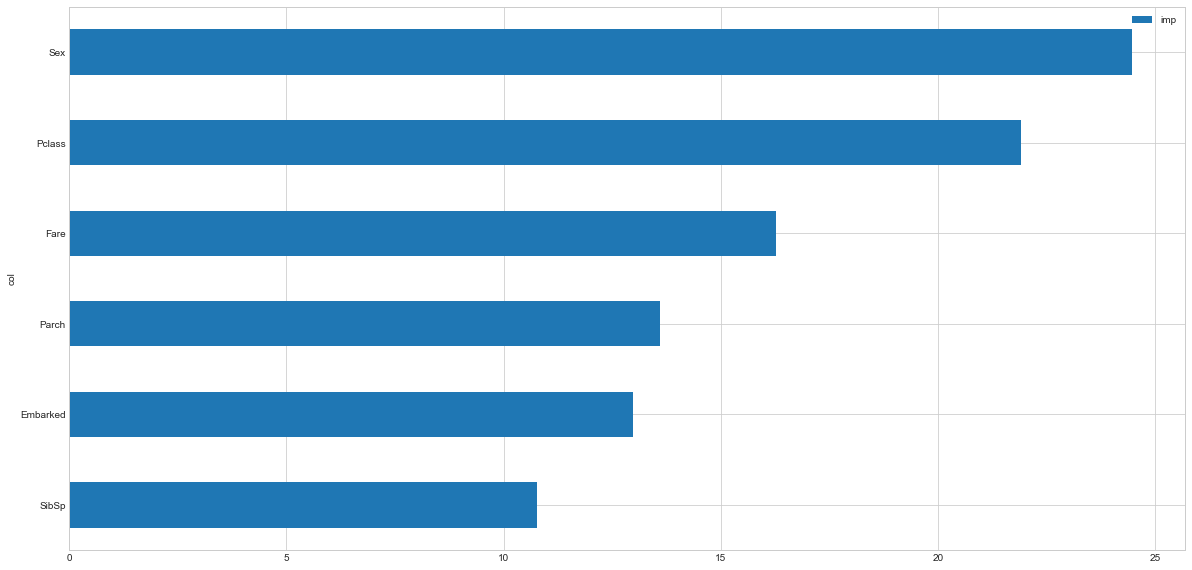

In [65]:
# Plot the feature importance scores
feature_importance(catboost_model, X_train)

## Using catboost model to make a prediction on test dataset

In [73]:
needed_columns=X_train.columns
needed_columns

Index(['Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Embarked'], dtype='object')

In [76]:
prediction=catboost_model.predict(test[needed_columns].apply(LabelEncoder().fit_transform))

In [80]:
prediction[:20]

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1],
      dtype=int64)

In [84]:
submission_df=pd.DataFrame()
submission_df['Passenger_Id']=test['PassengerId']
submission_df['Survived']=prediction
submission_df

,Passenger_Id,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [88]:
submission_df.to_csv('final-submit.csv', index=False)

In [89]:
show_df=pd.read_csv("final-submit.csv")
show_df

,Passenger_Id,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
